In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seawater as sw
import pandas as pd
from tqdm import tqdm
import cmocean
from datetime import datetime
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
import model

In [3]:
z=np.arange(0,900,.5)
dz = z[1]-z[0]
h_interface=(np.abs(z-450.0)).argmin()
T_cdw=.5
T_out=-1.84
S_cdw=34.51
S_out=34.03
T_relax=np.tanh((z-z[h_interface])/200)*(T_cdw-T_out)/2+(T_cdw+T_out)/2
S_relax=np.tanh((z-z[h_interface])/250)*(S_cdw-S_out)/2+(S_cdw+S_out)/2
#S_relax[h_interface:len(z)]=S_relax[h_interface:len(z)]+0.25*((z[h_interface:len(z)]-z[h_interface])/1000)
temperature_freezing = sw.fp(S_relax,z)

In [4]:
ocean = pd.read_csv("~/Downloads/sg221_winter_18_temp_sal.txt",delimiter='\t',dtype=np.float64)

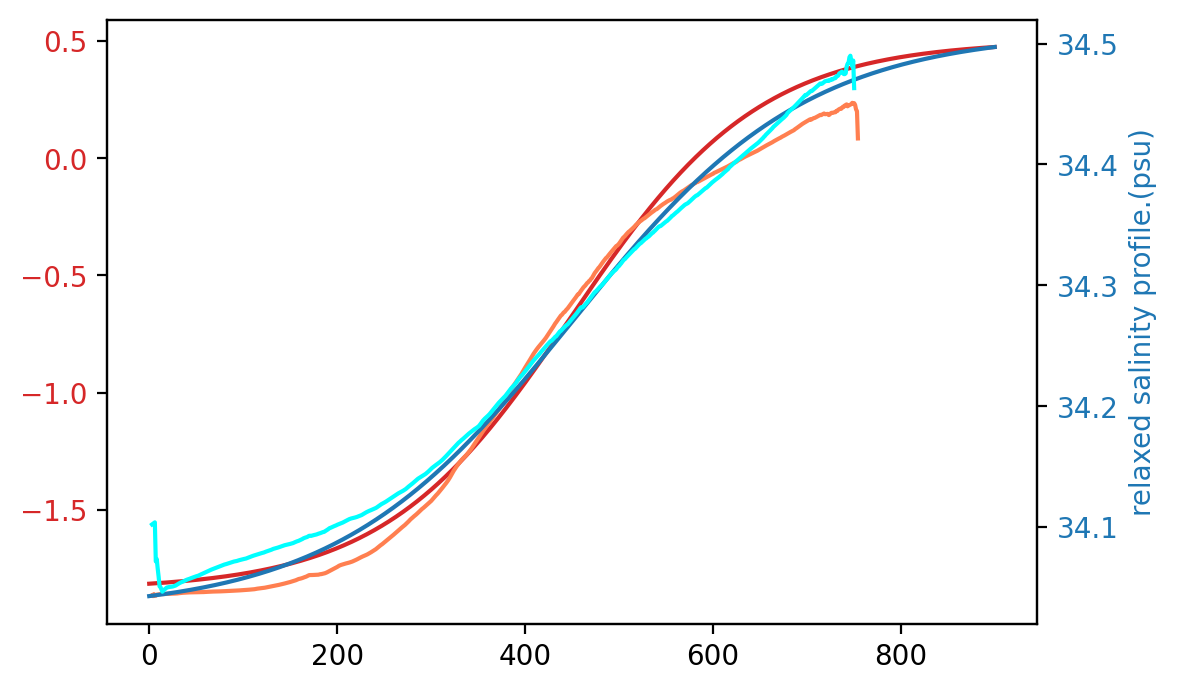

In [5]:
fig, ax1 = plt.subplots(dpi=200)

color = 'tab:red'
ax1.plot(z,T_relax,color=color)
ax1.plot(ocean['Depth(m)'],ocean['Temperature(C)'],color='coral')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('relaxed salinity profile.(psu)', color=color)  # we already handled the x-label with ax1
ax2.plot(z,S_relax,color=color)
ax2.plot(ocean['Depth(m)'],ocean['Salinity(PSU)'],color='cyan')
ax2.tick_params(axis='y', labelcolor=color)

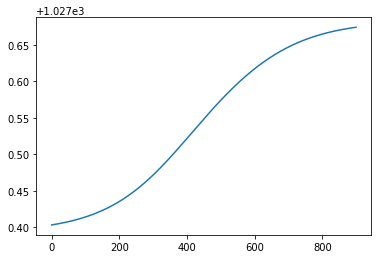

In [6]:
plt.plot(z,sw.dens0(S_relax, T_relax))

In [7]:
data=pd.read_csv("/Users/andrew/Downloads/era5_dotson_front_rectangle_1979_2020_v2.txt",delimiter='\t',dtype=np.float64)
data['wind_speed(m/s)']=np.sqrt(data['U_10m(m/s)']**2+data['V_10m(m/s)']**2)

hrs=1
days=1
data=data.rolling(hrs*days).sum()/(hrs*days)
data=data.fillna(data.mean())

data['time']=pd.date_range(start='1979-01-01',end='2021-01-01',freq='H')[:-1]
data['time']=pd.to_datetime(data['time'])
data=data.set_index(data['time'])

In [8]:
data19791990=pd.read_csv("/Users/andrew/Downloads/era5_dotson_front_rectangle_1979_1990_v2.txt",delimiter='\t',dtype=np.float64)
data19791990['wind_speed(m/s)']=np.sqrt(data19791990['U_10m(m/s)']**2+data19791990['V_10m(m/s)']**2)

hrs=1
days=1
data19791990=data19791990.rolling(hrs*days).sum()/(hrs*days)
data19791990=data19791990.fillna(data19791990.mean())

data19791990['time']=pd.date_range(start='1979-01-01',end='1991-01-01',freq='H')[:-1]
data19791990['time']=pd.to_datetime(data19791990['time'])
data19791990=data19791990.set_index(data19791990['time'])


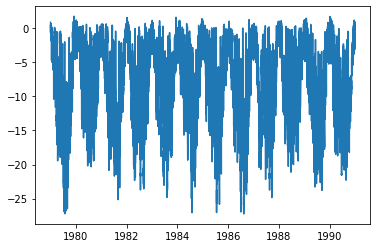

In [9]:
plt.plot(data19791990['Temp_2m(K)']-273.15)

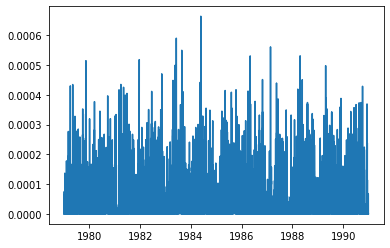

In [10]:
plt.plot(data19791990['Mean_Total_Precip_Rate(kg/m2s)'])

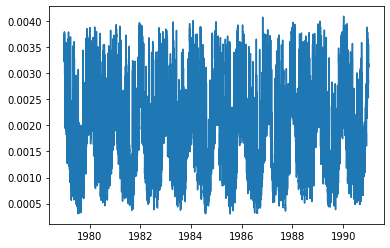

In [11]:
plt.plot(data19791990['Specific_Humidity_2m(kg/kg)'])

In [12]:
data19912000=pd.read_csv("/Users/andrew/Downloads/era5_dotson_front_rectangle_1991_2000_v2.txt",delimiter='\t',dtype=np.float64)
data19912000['wind_speed(m/s)']=np.sqrt(data19912000['U_10m(m/s)']**2+data19912000['V_10m(m/s)']**2)

data19912000=data19912000.rolling(hrs*days).sum()/(hrs*days)
data19912000=data19912000.fillna(data19912000.mean())

data19912000['time']=pd.date_range(start='1991-01-01',end='2001-01-01',freq='H')[:-1]
data19912000['time']=pd.to_datetime(data19912000['time'])
data19912000=data19912000.set_index(data19912000['time'])

In [13]:
data20012010=pd.read_csv("/Users/andrew/Downloads/era5_dotson_front_rectangle_2001_2010_v2.txt",delimiter='\t',dtype=np.float64)
data20012010['wind_speed(m/s)']=np.sqrt(data20012010['U_10m(m/s)']**2+data20012010['V_10m(m/s)']**2)


data20012010=data20012010.rolling(hrs*days).sum()/(hrs*days)
data20012010=data20012010.fillna(data20012010.mean())

data20012010['time']=pd.date_range(start='2001-01-01',end='2011-01-01',freq='H')[:-1]
data20012010['time']=pd.to_datetime(data20012010['time'])
data20012010=data20012010.set_index(data20012010['time'])


In [14]:
"""data=pd.read_csv("/Users/andrew/Downloads/era5_dotson_front_rectangle_2011_2020_v2.txt",delimiter='\t',dtype=np.float64)
data['wind_speed(m/s)']=np.sqrt(data['U_10m(m/s)']**2+data['V_10m(m/s)']**2)

hrs=1
days=1
data=data.rolling(hrs*days).sum()/(hrs*days)
data=data.fillna(data.mean())

data['time']=pd.date_range(start='2011-01-01',end='2021-01-01',freq='H')[:-1]
data['time']=pd.to_datetime(data['time'])
data=data.set_index(data['time'])"""

'data=pd.read_csv("/Users/andrew/Downloads/era5_dotson_front_rectangle_2011_2020_v2.txt",delimiter=\'\t\',dtype=np.float64)\ndata[\'wind_speed(m/s)\']=np.sqrt(data[\'U_10m(m/s)\']**2+data[\'V_10m(m/s)\']**2)\n\nhrs=1\ndays=1\ndata=data.rolling(hrs*days).sum()/(hrs*days)\ndata=data.fillna(data.mean())\n\ndata[\'time\']=pd.date_range(start=\'2011-01-01\',end=\'2021-01-01\',freq=\'H\')[:-1]\ndata[\'time\']=pd.to_datetime(data[\'time\'])\ndata=data.set_index(data[\'time\'])'

In [15]:
density = sw.dens0(S_relax, T_relax)
uvel = np.zeros(len(S_relax))
vvel = np.zeros(len(S_relax))

temperature_out = np.zeros((len(S_relax),len(data['Time(year)'])))
salinity_out = np.zeros((len(S_relax),len(data['Time(year)'])))
density_out = np.zeros((len(S_relax),len(data['Time(year)'])))
vel_relax_out = np.zeros((len(S_relax),len(data['Time(year)'])))
uvel_out = np.zeros((len(S_relax),len(data['Time(year)'])))
vvel_out = np.zeros((len(S_relax),len(data['Time(year)'])))
mld_out = np.zeros(len(data['Time(year)']))
sea_ice_thickness_out = np.zeros(len(data['Time(year)']))
sea_ice_concentration_out = np.zeros(len(data['Time(year)']))
ocean_temperature_out = np.zeros(len(data['Time(year)']))
ice_temperature_out = np.zeros(len(data['Time(year)']))
flux_in_out = np.zeros(len(data['Time(year)']))

HE_out = np.zeros(len(data['Time(year)']))
HR_out = np.zeros(len(data['Time(year)']))
HS_out = np.zeros(len(data['Time(year)']))
SE_out = np.zeros(len(data['Time(year)']))
SR_out = np.zeros(len(data['Time(year)']))
SP_out = np.zeros(len(data['Time(year)']))
SM_out = np.zeros(len(data['Time(year)']))


intial_thickness=0.1
initial_concentration=0.0

temperature, salinity, density, uvel, vvel, mld, sea_ice_thickness, sea_ice_concentration, ocean_surface_temperature, ice_surface_temperature, flux_in, v_relax,HE,HR, HS,SE,SR,SP,SM = model.icy_pwp(intial_thickness,initial_concentration,T_relax,S_relax,T_relax,S_relax,density,uvel,vvel,data['Mean_East_Turbulent_Shear_Stress(Ns/m2)'][0],data['Mean_North_Turbulent_Shear_Stress(Ns/m2)'][0],z,data['Mean_DW_SW_Flux(W/m2)'][0],data['Mean_DW_LW_Flux(W/m2)'][0],data['Temp_2m(K)'][0],data['Temp_2m(K)'][0],data['Surface_Pressure(Pa)'][0]/1000.0,data['wind_speed(m/s)'][0],data['1000hPa_Specific_Humidity(kg/kg)'][0],data['Mean_Total_Precip_Rate(kg/m2s)'][0],5e-3,0.0,3600,T_cdw=T_cdw, T_out=T_out, S_cdw=S_cdw, S_out=S_out,A_max=.75,divergence=1.0,domain=5e4)

#start_ind=int(len(data['Time(year)'])*7/10)
#end_ind=int(len(data['Time(year)'])*8/10)

for i in tqdm(range(len(data['Time(year)']))):
    temperature, salinity, density, uvel, vvel, mld, sea_ice_thickness, sea_ice_concentration, ocean_surface_temperature, ice_surface_temperature, flux_in, v_relax,HE,HR, HS,SE,SR,SP,SM = model.icy_pwp(sea_ice_thickness,sea_ice_concentration,T_relax,S_relax,temperature,salinity,density,uvel,vvel,data['Mean_East_Turbulent_Shear_Stress(Ns/m2)'][i],data['Mean_North_Turbulent_Shear_Stress(Ns/m2)'][i],z,data['Mean_DW_SW_Flux(W/m2)'][i],data['Mean_DW_LW_Flux(W/m2)'][i],data['Temp_2m(K)'][i],data['Temp_2m(K)'][i],data['Surface_Pressure(Pa)'][i]/1000.0,data['wind_speed(m/s)'][i],data['1000hPa_Specific_Humidity(kg/kg)'][i],data['Mean_Total_Precip_Rate(kg/m2s)'][i],5e-3,0.0,3600,T_cdw=T_cdw, T_out=T_out, S_cdw=S_cdw, S_out=S_out,A_max=.75,divergence=1.0,domain=5e4)
    temperature_out[:,i] = temperature.copy() 
    salinity_out[:,i] = salinity.copy()
    density_out[:,i] = density.copy()
    uvel_out[:,i] = uvel.copy()
    vvel_out[:,i] = vvel.copy()
    mld_out[i] =  mld.copy()
    sea_ice_thickness_out[i] = sea_ice_thickness.copy()
    sea_ice_concentration_out[i] = sea_ice_concentration.copy()
    ocean_temperature_out[i] = ocean_surface_temperature.copy()
    ice_temperature_out[i] = ice_surface_temperature.copy()
    flux_in_out[i]=flux_in.copy()
    vel_relax_out[:,i] = v_relax.copy()
    
    HE_out[i]=HE.copy()
    HR_out[i]=HR.copy()
    HS_out[i]=HS.copy()
    SE_out[i]=SE.copy()
    SR_out[i]=SR.copy()
    SP_out[i]=SP.copy()
    SM_out[i]=SM.copy()

 41%|████      | 150783/368184 [2:01:38<2:55:23, 20.66it/s] 


IndexError: index 0 is out of bounds for axis 0 with size 0

In [16]:
flux_df=pd.DataFrame(flux_in_out.transpose(),index = data.index)
flux_mean=flux_df.groupby([(flux_df.index.month),(flux_df.index.day),(flux_df.index.hour)]).mean()
flux_std=flux_df.groupby([(flux_df.index.month),(flux_df.index.day),(flux_df.index.hour)]).std()



In [17]:
temperature_df = pd.DataFrame(temperature_out.transpose(),index = data.index)
salinity_df = pd.DataFrame(salinity_out.transpose(),index = data.index)
density_df = pd.DataFrame(density_out.transpose(),index = data.index)
temp_mean=temperature_df.groupby([(temperature_df.index.month),(temperature_df.index.day),(temperature_df.index.hour)]).mean()
temp_std=temperature_df.groupby([(temperature_df.index.month),(temperature_df.index.day),(temperature_df.index.hour)]).std()
sal_mean=salinity_df.groupby([(salinity_df.index.month),(salinity_df.index.day),(salinity_df.index.hour)]).mean()
sal_std=salinity_df.groupby([(salinity_df.index.month),(salinity_df.index.day),(salinity_df.index.hour)]).std()
density_mean=density_df.groupby([(density_df.index.month),(density_df.index.day),(density_df.index.hour)]).mean()
density_std=density_df.groupby([(density_df.index.month),(density_df.index.day),(density_df.index.hour)]).std()
times=pd.date_range(start='2012-01-01',end='2013-01-01',freq='H')[:-1]

In [18]:
sea_ice_out=(sea_ice_thickness_out*sea_ice_concentration_out)

In [19]:
mld_df = pd.DataFrame(mld_out.transpose(),index = data.index)
sea_ice_df = pd.DataFrame(sea_ice_out.transpose(),index=data.index)
A_df = pd.DataFrame(sea_ice_concentration_out.transpose(),index=data.index)

mld_mean=mld_df.groupby([(mld_df.index.month),(mld_df.index.day),(mld_df.index.hour)]).mean()
mld_std=mld_df.groupby([(mld_df.index.month),(mld_df.index.day),(mld_df.index.hour)]).std()

sea_ice_mean=sea_ice_df.groupby([(sea_ice_df.index.month),(sea_ice_df.index.day),(sea_ice_df.index.hour)]).mean()
sea_ice_std=sea_ice_df.groupby([(sea_ice_df.index.month),(sea_ice_df.index.day),(sea_ice_df.index.hour)]).std()

A_mean = A_df.groupby([(A_df.index.month),(A_df.index.day),(A_df.index.hour)]).mean()
A_std=A_df.groupby([(A_df.index.month),(A_df.index.day),(A_df.index.hour)]).std()



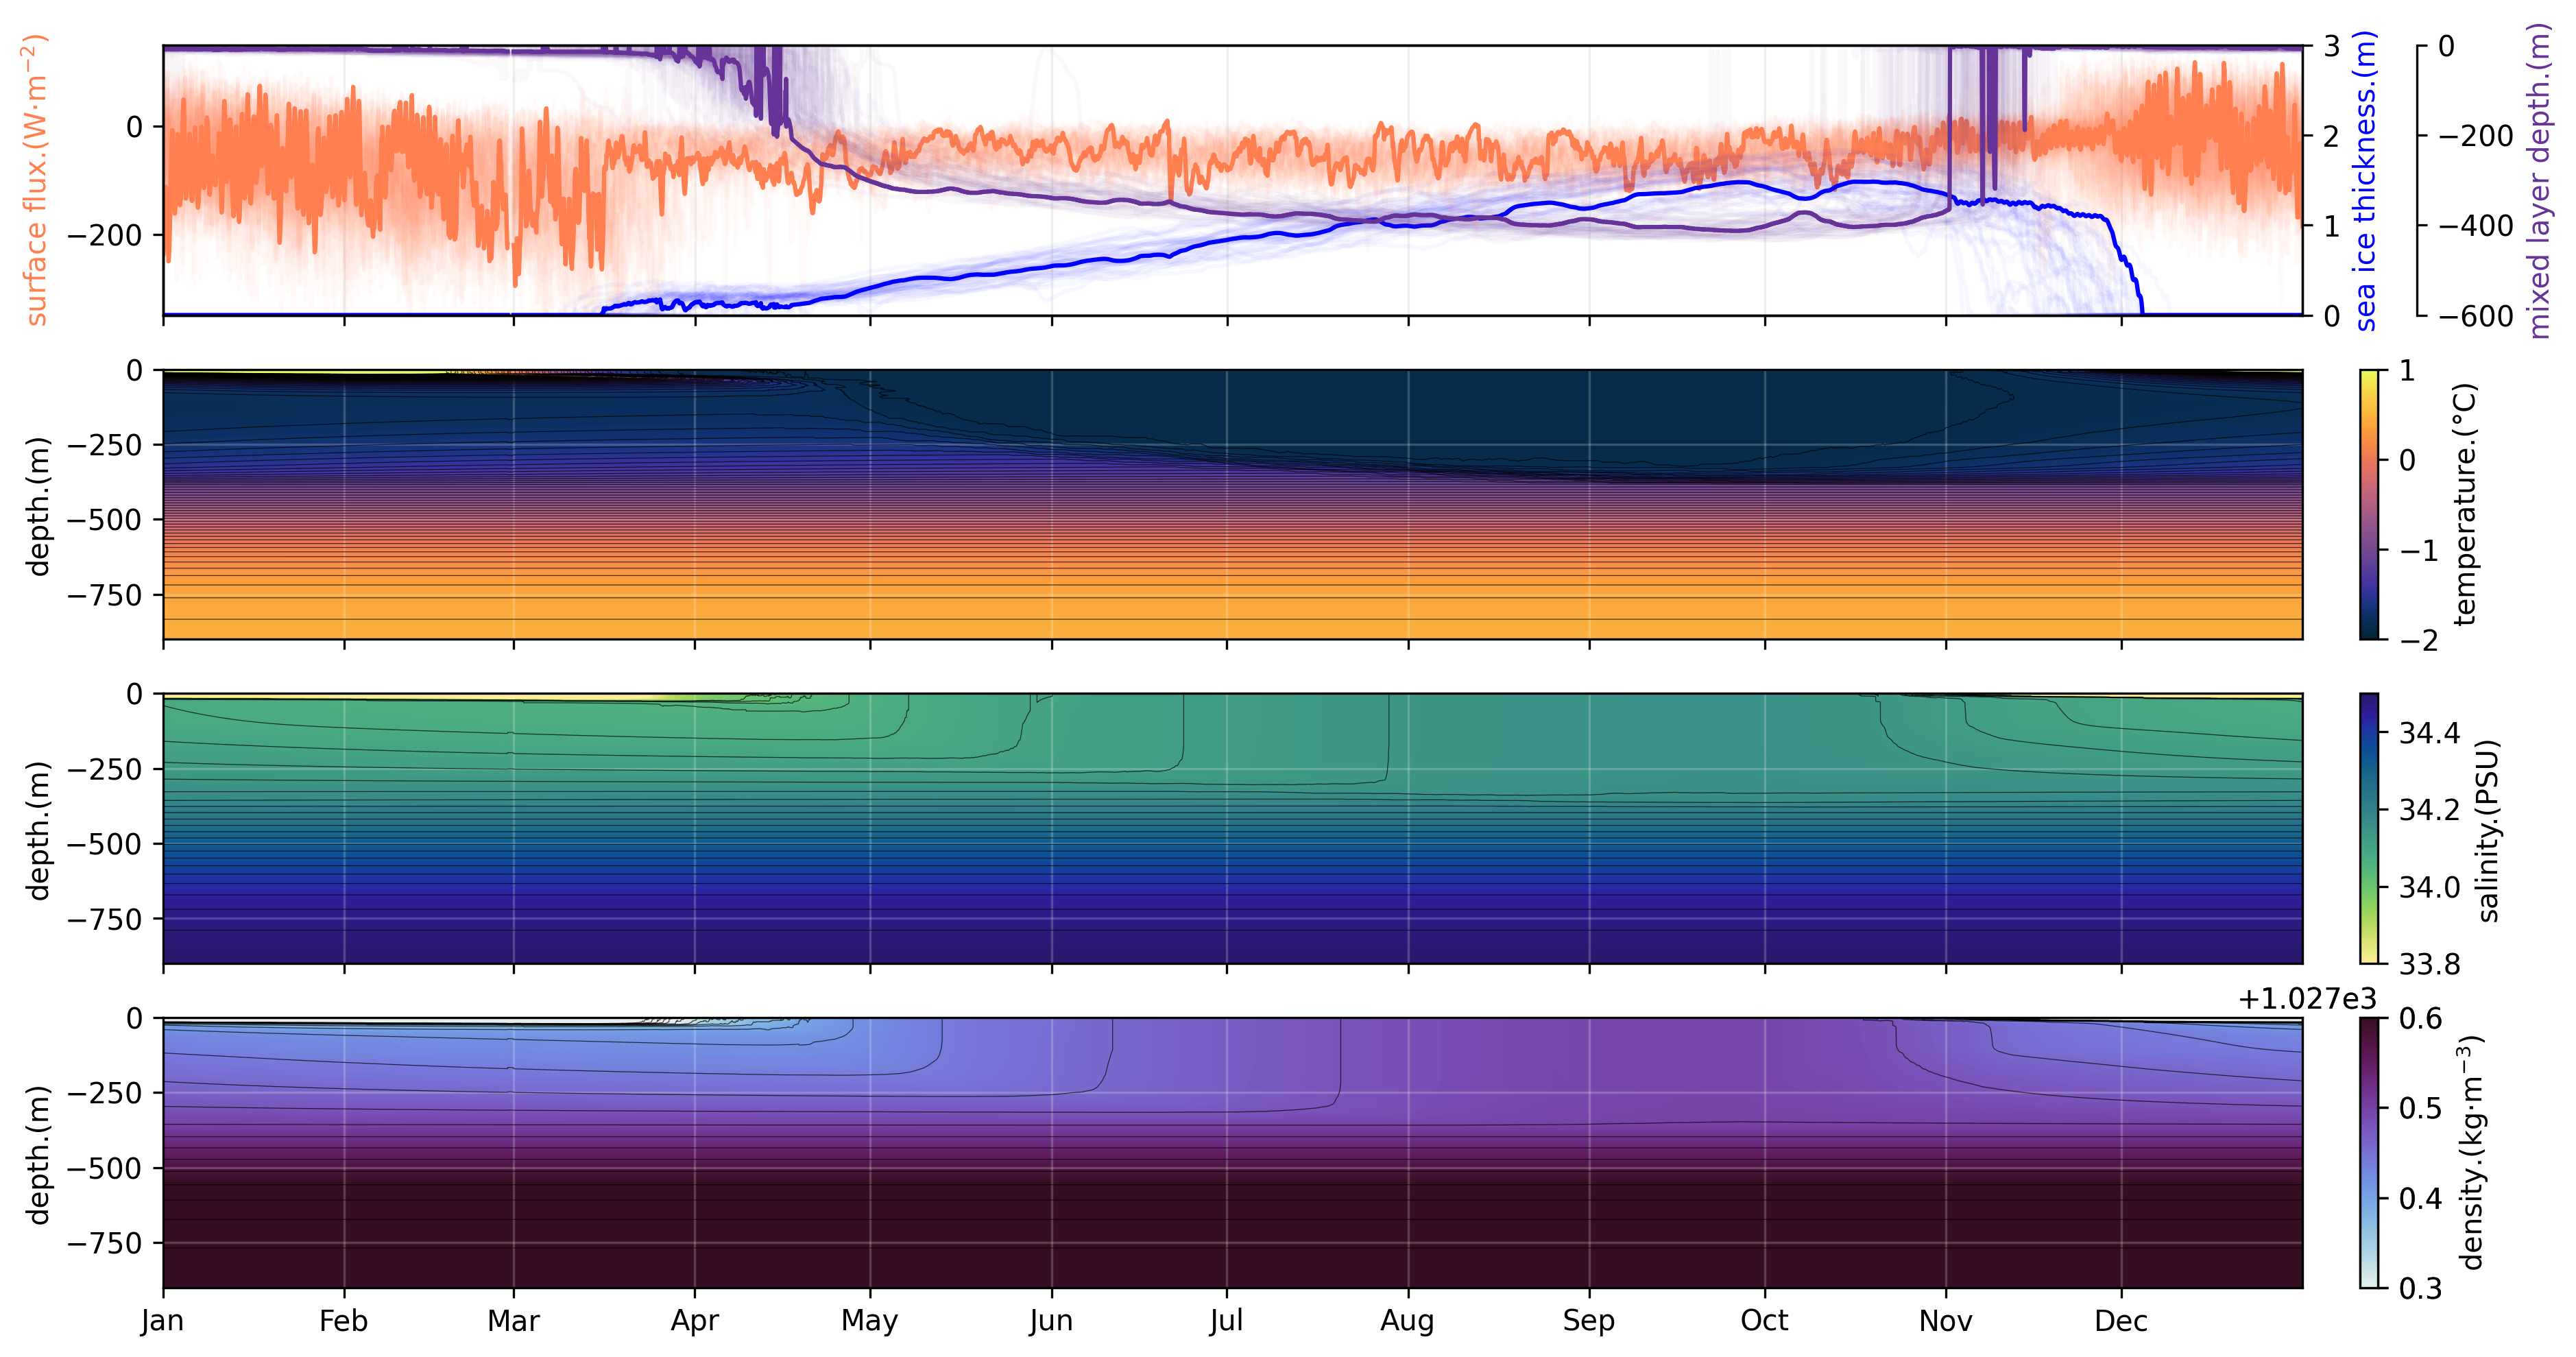

In [20]:
x1=mdates.date2num(times[0].to_datetime64())
x2=mdates.date2num(times[-1].to_datetime64())
x=mdates.date2num(np.array(times.to_pydatetime(), dtype=np.datetime64))

fig,(ax4,ax1,ax2,ax3)=plt.subplots(4,1,figsize=(14,8),sharex=True,dpi=300)



ax1.contour(np.flipud(temp_mean.transpose()),levels=np.arange(-2,1.0,.05),linestyles='solid',colors='black',linewidths=.3,alpha=.7,extent=[x1,x2,-900,0])
img1=ax1.imshow(temp_mean.transpose(),cmap=cmocean.cm.thermal,aspect='auto',extent=[x1,x2,-900,0],vmin=-2,vmax=1)
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="2.4%", pad=0.2)
cbar1=plt.colorbar(img1,cax=cax1)
cax1.set_aspect(15)

#ax.plot(x,-mld_out,color='white',linestyle='--',linewidth=.3)


ax2.contour(np.flipud(sal_mean.transpose()),levels=np.arange(34.0,34.5,.02),linestyles='solid',colors='black',linewidths=.3,alpha=.7,extent=[x1,x2,-900,0])
img2=ax2.imshow(sal_mean.transpose(),cmap=cmocean.cm.haline_r,aspect='auto',extent=[x1,x2,-900,0],vmin=33.8,vmax=34.5)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="2.4%", pad=0.2)
cbar2=plt.colorbar(img2,cax=cax2)
cax2.set_aspect(15)


ax3.contour(np.flipud(density_mean.transpose()),levels=np.arange(1027.2,1027.7,.02),linestyles='solid',colors='black',linewidths=.3,alpha=.7,extent=[x1,x2,-900,0])
img3=ax3.imshow(density_mean.transpose(),cmap=cmocean.cm.dense,aspect='auto',extent=[x1,x2,-900,0],vmin=1027.3,vmax=1027.6)
divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes("right", size="2.4%", pad=0.2)
cbar3=plt.colorbar(img3,cax=cax3)
cax3.set_aspect(15)

par1 = ax4.twinx()
par2 = ax4.twinx()
    
ax4.set_ylim(-350, 150)
par1.set_ylim(0, 3.0)
par2.set_ylim(-600,0)
    

par2.set_ylabel("mixed layer depth.(m)")
par1.set_ylabel("sea ice thickness.(m)")
ax4.set_ylabel("surface flux.(W$\cdot$m$^{-2}$)")

color1 = 'rebeccapurple'
color2 = 'blue'
color3 = 'coral'

pf = pd.pivot_table(flux_df,index=[(flux_df.index.month),(flux_df.index.day),(mld_df.index.hour)],columns=flux_df.index.year,values=0)
psi = pd.pivot_table(sea_ice_df,index=[(sea_ice_df.index.month),(sea_ice_df.index.day),(sea_ice_df.index.hour)],columns=sea_ice_df.index.year,values=0)
pmld= pd.pivot_table(mld_df,index=[(mld_df.index.month),(mld_df.index.day),(mld_df.index.hour)],columns=mld_df.index.year,values=0)


#par1.fill_between(x, sea_ice_mean[0].to_numpy()-sea_ice_std[0].to_numpy(),sea_ice_mean[0].to_numpy()+sea_ice_std[0].to_numpy(),color=color2,alpha=.3)
ax4.plot(x, pf.to_numpy()[:,8],color=color3, label="surface flux.(W$\cdot$m$^{-2}$)")
ax4.plot(x, pf.to_numpy(),color=color3,alpha=.03)
#par2.fill_between(x, flux_mean[0].to_numpy()-flux_std[0].to_numpy(),flux_mean[0].to_numpy()+flux_std[0].to_numpy(),color=color3,alpha=.3)
# right, left, top, bottom


par2.plot(x,-pmld.to_numpy()[:,8],color=color1,label="mixed layer depth.(m)")
par2.plot(x, -pmld.to_numpy(),color=color1,alpha=.03)
#ax4.fill_between(x, -(mld_mean[0].to_numpy()-mld_std[0].to_numpy()),-(mld_mean[0].to_numpy()+mld_std[0].to_numpy()),color=color1,alpha=.3)
par1.plot(x, psi.to_numpy()[:,8],color=color2,label="sea ice thickness.(m)")
par1.plot(x, psi.to_numpy(),color=color2,alpha=.03)
#par1.fill_between(x, sea_ice_mean[0].to_numpy()-sea_ice_std[0].to_numpy(),sea_ice_mean[0].to_numpy()+sea_ice_std[0].to_numpy(),color=color2,alpha=.3)
par2.spines['right'].set_position(('outward', 40))


# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

# Move "Velocity"-axis to the left
# par2.spines['left'].set_position(('outward', 60))
# par2.spines['left'].set_visible(True)
# par2.yaxis.set_label_position('left')
# par2.yaxis.set_ticks_position('left')

ax4.yaxis.label.set_color(color3)
par1.yaxis.label.set_color(color2)
par2.yaxis.label.set_color(color1)

ax4.xaxis_date()
ax4.tick_params(axis='y')


divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes("right", size="2.4%", pad=0.2)
cbar3=plt.colorbar(img3,cax=cax3)
cax3.set_aspect(15)


ax1.set_ylabel('depth.(m)')
ax2.set_ylabel('depth.(m)')
ax3.set_ylabel('depth.(m)')

cbar1.set_label(r'temperature.($\degree$C)')
ax1.xaxis_date()

cbar2.set_label(r'salinity.(PSU)')
ax2.xaxis_date()

cbar3.set_label(r'density.(kg$\cdot$m$^{-3}$)')
ax3.xaxis_date()

date_format = mdates.DateFormatter('%b')

ax4.get_shared_x_axes().join(ax1, ax2, ax3, ax4)
ax4.xaxis_date()
ax4.set_xticklabels([])


ax3.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
ax1.grid(color='white', linestyle='-',alpha=.2)
ax2.grid(color='white', linestyle='-',alpha=.2)
ax3.grid(color='white', linestyle='-',alpha=.2)
ax4.xaxis.grid(True,linestyle='-',alpha=.2)

pos = ax1.get_position()
pos2 = ax4.get_position()
ax4.set_position([pos.x0,pos2.y0,pos.width-.032,pos2.height])

plt.show()

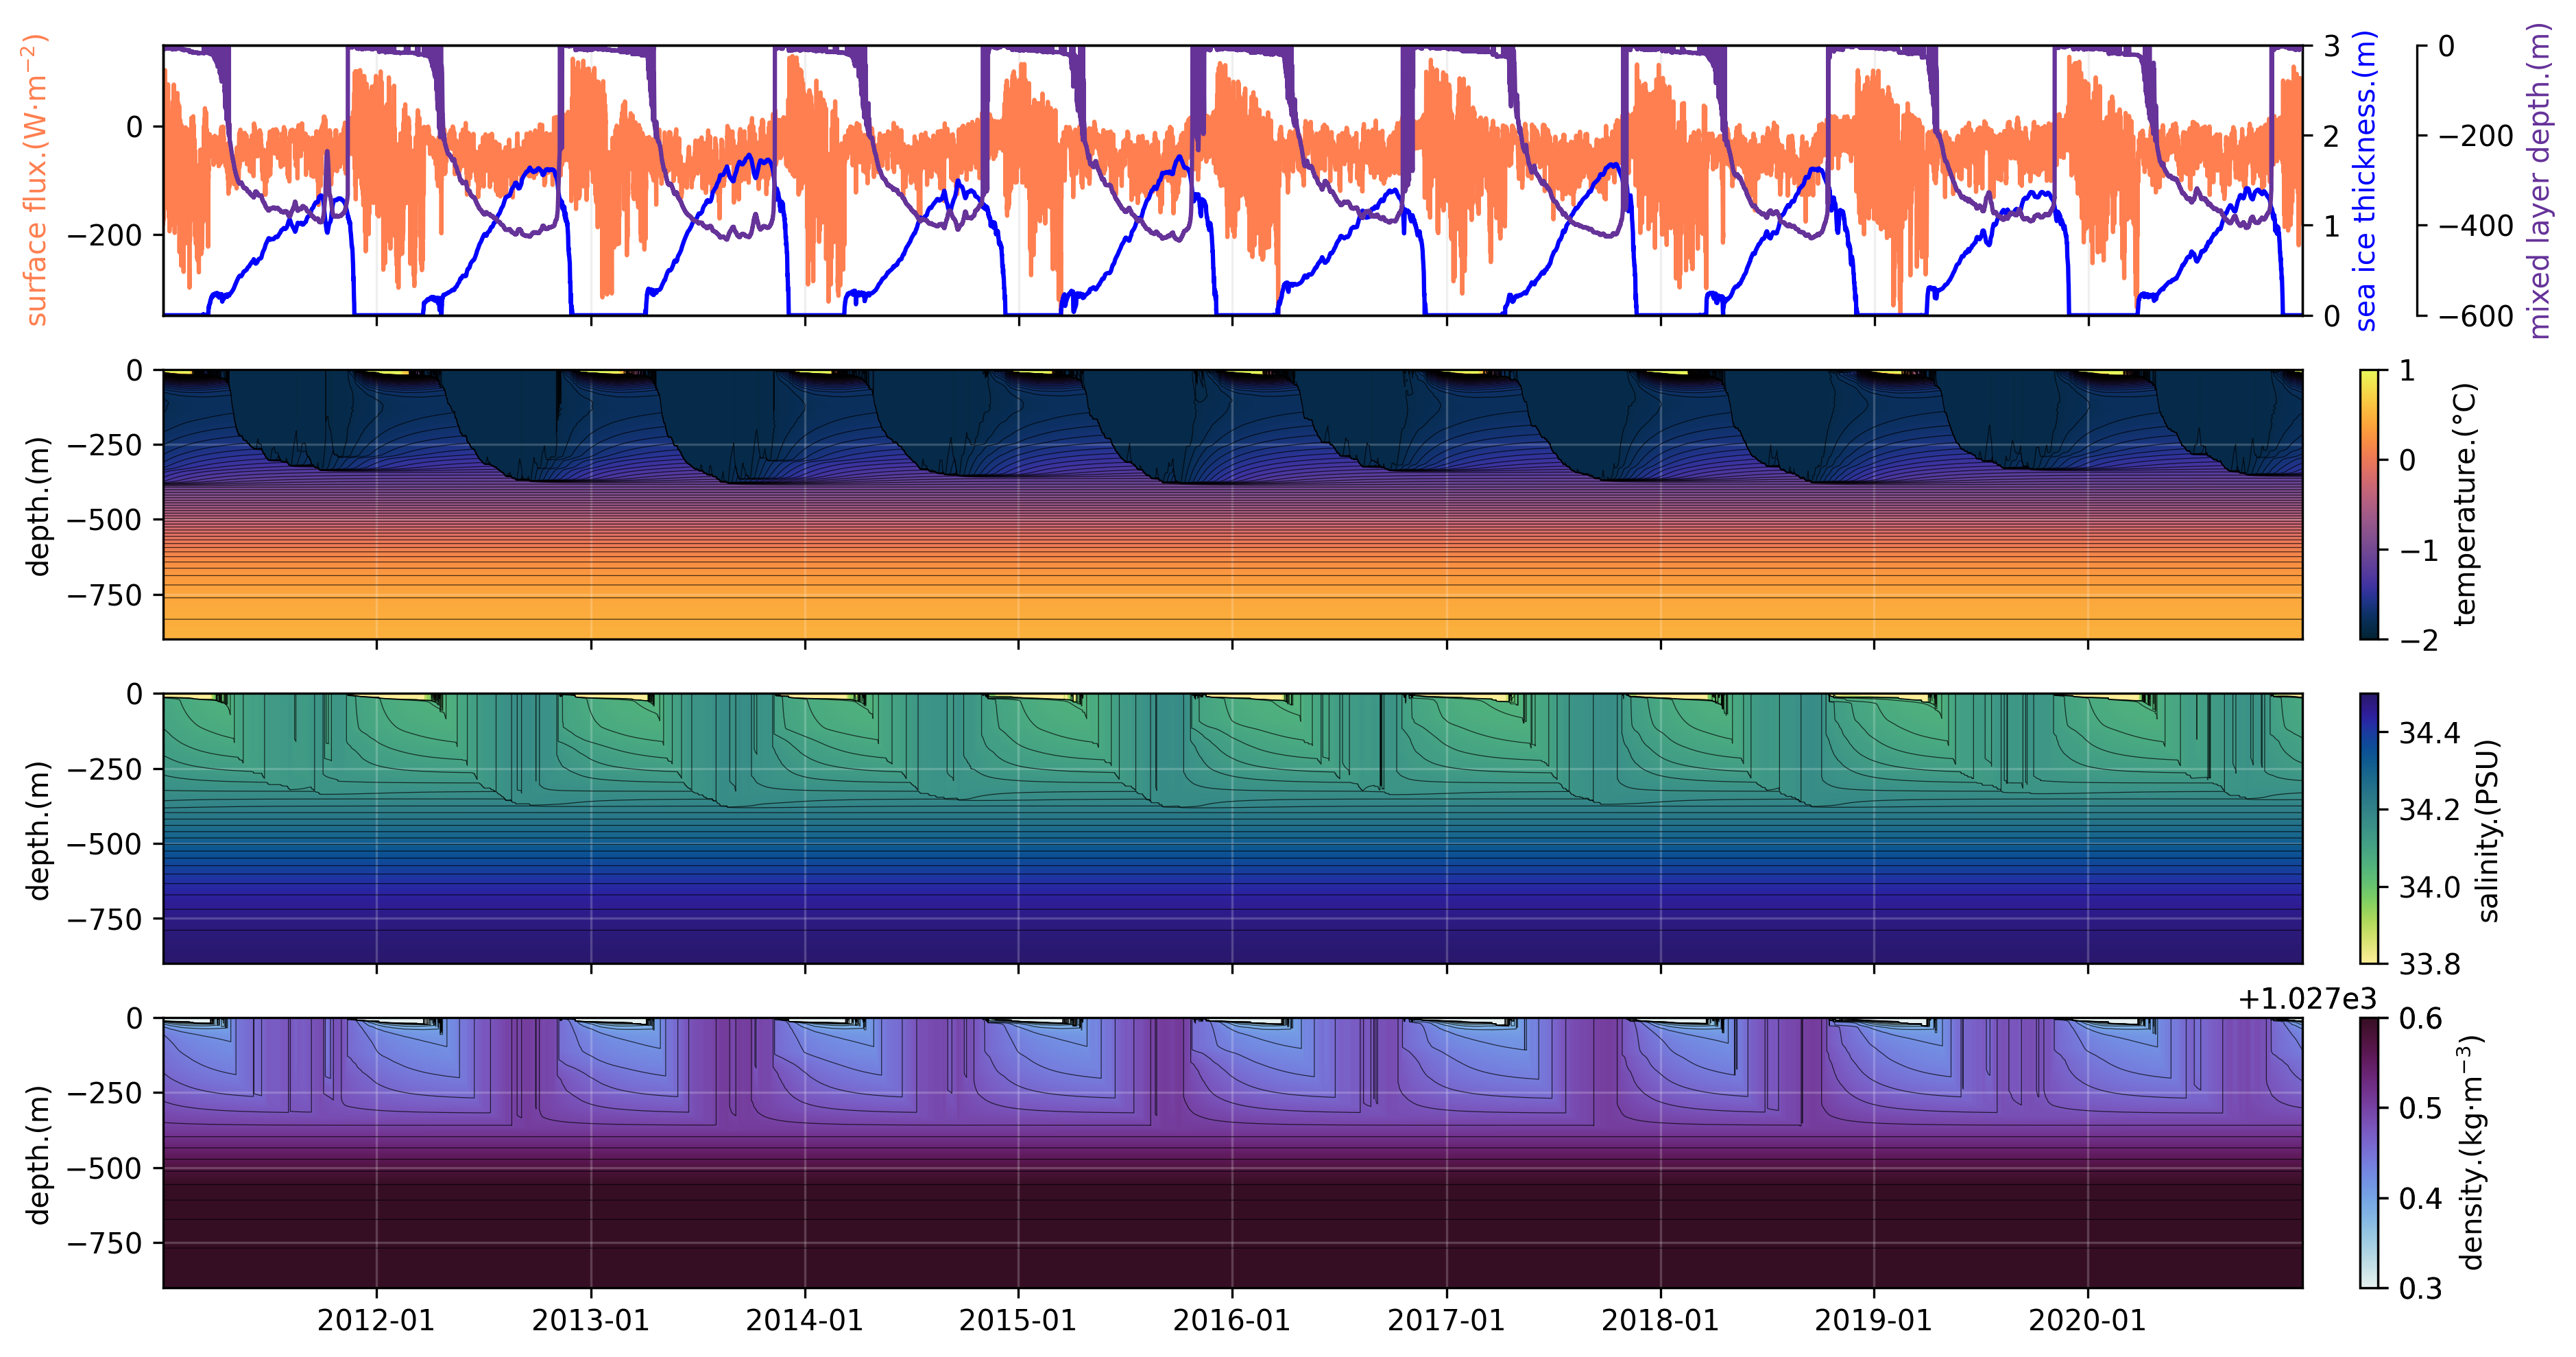

In [21]:
fig,(ax4,ax1,ax2,ax3)=plt.subplots(4,1,figsize=(14,8),sharex=True,dpi=300)

start_ind=int(-8767*10)
end_ind=int(-1)

x1=mdates.date2num(data.index[start_ind].to_datetime64())
x2=mdates.date2num(data.index[end_ind].to_datetime64())
x=mdates.date2num(np.array(data.index[start_ind:end_ind].to_pydatetime(), dtype=np.datetime64))

ax1.contour(np.flipud(temperature_out[:,start_ind:end_ind]),levels=np.arange(-2,.5,.05),linestyles='solid',colors='black',linewidths=.3,alpha=.7,extent=[x1,x2,-900,0])
img1=ax1.imshow(temperature_out[:,start_ind:end_ind],cmap=cmocean.cm.thermal,aspect='auto',extent=[x1,x2,-900,0],vmin=-2,vmax=1)
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="2.4%", pad=0.2)
cbar1=plt.colorbar(img1,cax=cax1)
cax1.set_aspect(15)

#ax.plot(x,-mld_out,color='white',linestyle='--',linewidth=.3)


ax2.contour(np.flipud(salinity_out[:,start_ind:end_ind]),levels=np.arange(34.0,34.5,.02),linestyles='solid',colors='black',linewidths=.3,alpha=.7,extent=[x1,x2,-900,0])
img2=ax2.imshow(salinity_out[:,start_ind:end_ind],cmap=cmocean.cm.haline_r,aspect='auto',extent=[x1,x2,-900,0],vmin=33.8,vmax=34.5)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="2.4%", pad=0.2)
cbar2=plt.colorbar(img2,cax=cax2)
cax2.set_aspect(15)


ax3.contour(np.flipud(density_out[:,start_ind:end_ind]),levels=np.arange(1027.2,1027.7,.02),linestyles='solid',colors='black',linewidths=.3,alpha=.7,extent=[x1,x2,-900,0])
img3=ax3.imshow(density_out[:,start_ind:end_ind],cmap=cmocean.cm.dense,aspect='auto',extent=[x1,x2,-900,0],vmin=1027.3,vmax=1027.6)
divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes("right", size="2.4%", pad=0.2)
cbar3=plt.colorbar(img3,cax=cax3)
cax3.set_aspect(15)

par1 = ax4.twinx()
par2 = ax4.twinx()
    
ax4.set_ylim(-350, 150)
par1.set_ylim(0, 3.0)
par2.set_ylim(-600,0)
    

par2.set_ylabel("mixed layer depth.(m)")
par1.set_ylabel("sea ice thickness.(m)")
ax4.set_ylabel("surface flux.(W$\cdot$m$^{-2}$)")

color1 = 'rebeccapurple'
color2 = 'blue'
color3 = 'coral'


#par1.fill_between(x, sea_ice_mean[0].to_numpy()-sea_ice_std[0].to_numpy(),sea_ice_mean[0].to_numpy()+sea_ice_std[0].to_numpy(),color=color2,alpha=.3)
ax4.plot(x, flux_in_out[start_ind:end_ind],color=color3, label="surface flux.(W$\cdot$m$^{-2}$)")
#par2.fill_between(x, flux_mean[0].to_numpy()-flux_std[0].to_numpy(),flux_mean[0].to_numpy()+flux_std[0].to_numpy(),color=color3,alpha=.3)
# right, left, top, bottom
par2.plot(x,-mld_out[start_ind:end_ind],color=color1,label="mixed layer depth.(m)")
#ax4.fill_between(x, -(mld_mean[0].to_numpy()-mld_std[0].to_numpy()),-(mld_mean[0].to_numpy()+mld_std[0].to_numpy()),color=color1,alpha=.3)
par1.plot(x, sea_ice_out[start_ind:end_ind],color=color2,label="sea ice thickness.(m)")
#par1.fill_between(x, sea_ice_mean[0].to_numpy()-sea_ice_std[0].to_numpy(),sea_ice_mean[0].to_numpy()+sea_ice_std[0].to_numpy(),color=color2,alpha=.3)
par2.spines['right'].set_position(('outward', 40))


# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

# Move "Velocity"-axis to the left
# par2.spines['left'].set_position(('outward', 60))
# par2.spines['left'].set_visible(True)
# par2.yaxis.set_label_position('left')
# par2.yaxis.set_ticks_position('left')

ax4.yaxis.label.set_color(color3)
par1.yaxis.label.set_color(color2)
par2.yaxis.label.set_color(color1)

ax4.xaxis_date()
ax4.tick_params(axis='y')


divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes("right", size="2.4%", pad=0.2)
cbar3=plt.colorbar(img3,cax=cax3)
cax3.set_aspect(15)


ax1.set_ylabel('depth.(m)')
ax2.set_ylabel('depth.(m)')
ax3.set_ylabel('depth.(m)')

cbar1.set_label(r'temperature.($\degree$C)')
ax1.xaxis_date()

cbar2.set_label(r'salinity.(PSU)')
ax2.xaxis_date()

cbar3.set_label(r'density.(kg$\cdot$m$^{-3}$)')
ax3.xaxis_date()

date_format = mdates.DateFormatter('%Y-%m')

ax4.get_shared_x_axes().join(ax1, ax2, ax3, ax4)
ax4.xaxis_date()
ax4.set_xticklabels([])


ax3.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
ax1.grid(color='white', linestyle='-',alpha=.2)
ax2.grid(color='white', linestyle='-',alpha=.2)
ax3.grid(color='white', linestyle='-',alpha=.2)
ax4.xaxis.grid(True,linestyle='-',alpha=.2)

pos = ax1.get_position()
pos2 = ax4.get_position()
ax4.set_position([pos.x0,pos2.y0,pos.width-.032,pos2.height])

plt.show()

In [17]:
HSflux=pd.DataFrame(HS_out.transpose()).set_index(data['time']).resample('Q-Nov').sum()
HRflux=pd.DataFrame(HR_out.transpose()).set_index(data['time']).resample('Q-Nov').sum()
HEflux=pd.DataFrame(HE_out.transpose()).set_index(data['time']).resample('Q-Nov').sum()


SEflux=pd.DataFrame(SE_out.transpose()).set_index(data['time']).resample('Q-Nov').sum()
SPflux=pd.DataFrame(SP_out.transpose()).set_index(data['time']).resample('Q-Nov').sum()
SRflux=pd.DataFrame(SR_out.transpose()).set_index(data['time']).resample('Q-Nov').sum()
SMflux=pd.DataFrame(SM_out.transpose()).set_index(data['time']).resample('Q-Nov').sum()



In [18]:
hs_table = pd.pivot_table(HSflux,index=[(HSflux.index.month)],columns=HSflux.index.year,values=0)
hr_table = pd.pivot_table(HRflux,index=[(HRflux.index.month)],columns=HRflux.index.year,values=0)
he_table = pd.pivot_table(HEflux,index=[(HEflux.index.month)],columns=HEflux.index.year,values=0)

se_table = pd.pivot_table(SEflux,index=[(SEflux.index.month)],columns=SEflux.index.year,values=0)
sp_table = pd.pivot_table(SPflux,index=[(SPflux.index.month)],columns=SPflux.index.year,values=0)
sr_table = pd.pivot_table(SRflux,index=[(SRflux.index.month)],columns=SRflux.index.year,values=0)
sm_table = pd.pivot_table(SMflux,index=[(SMflux.index.month)],columns=SMflux.index.year,values=0)




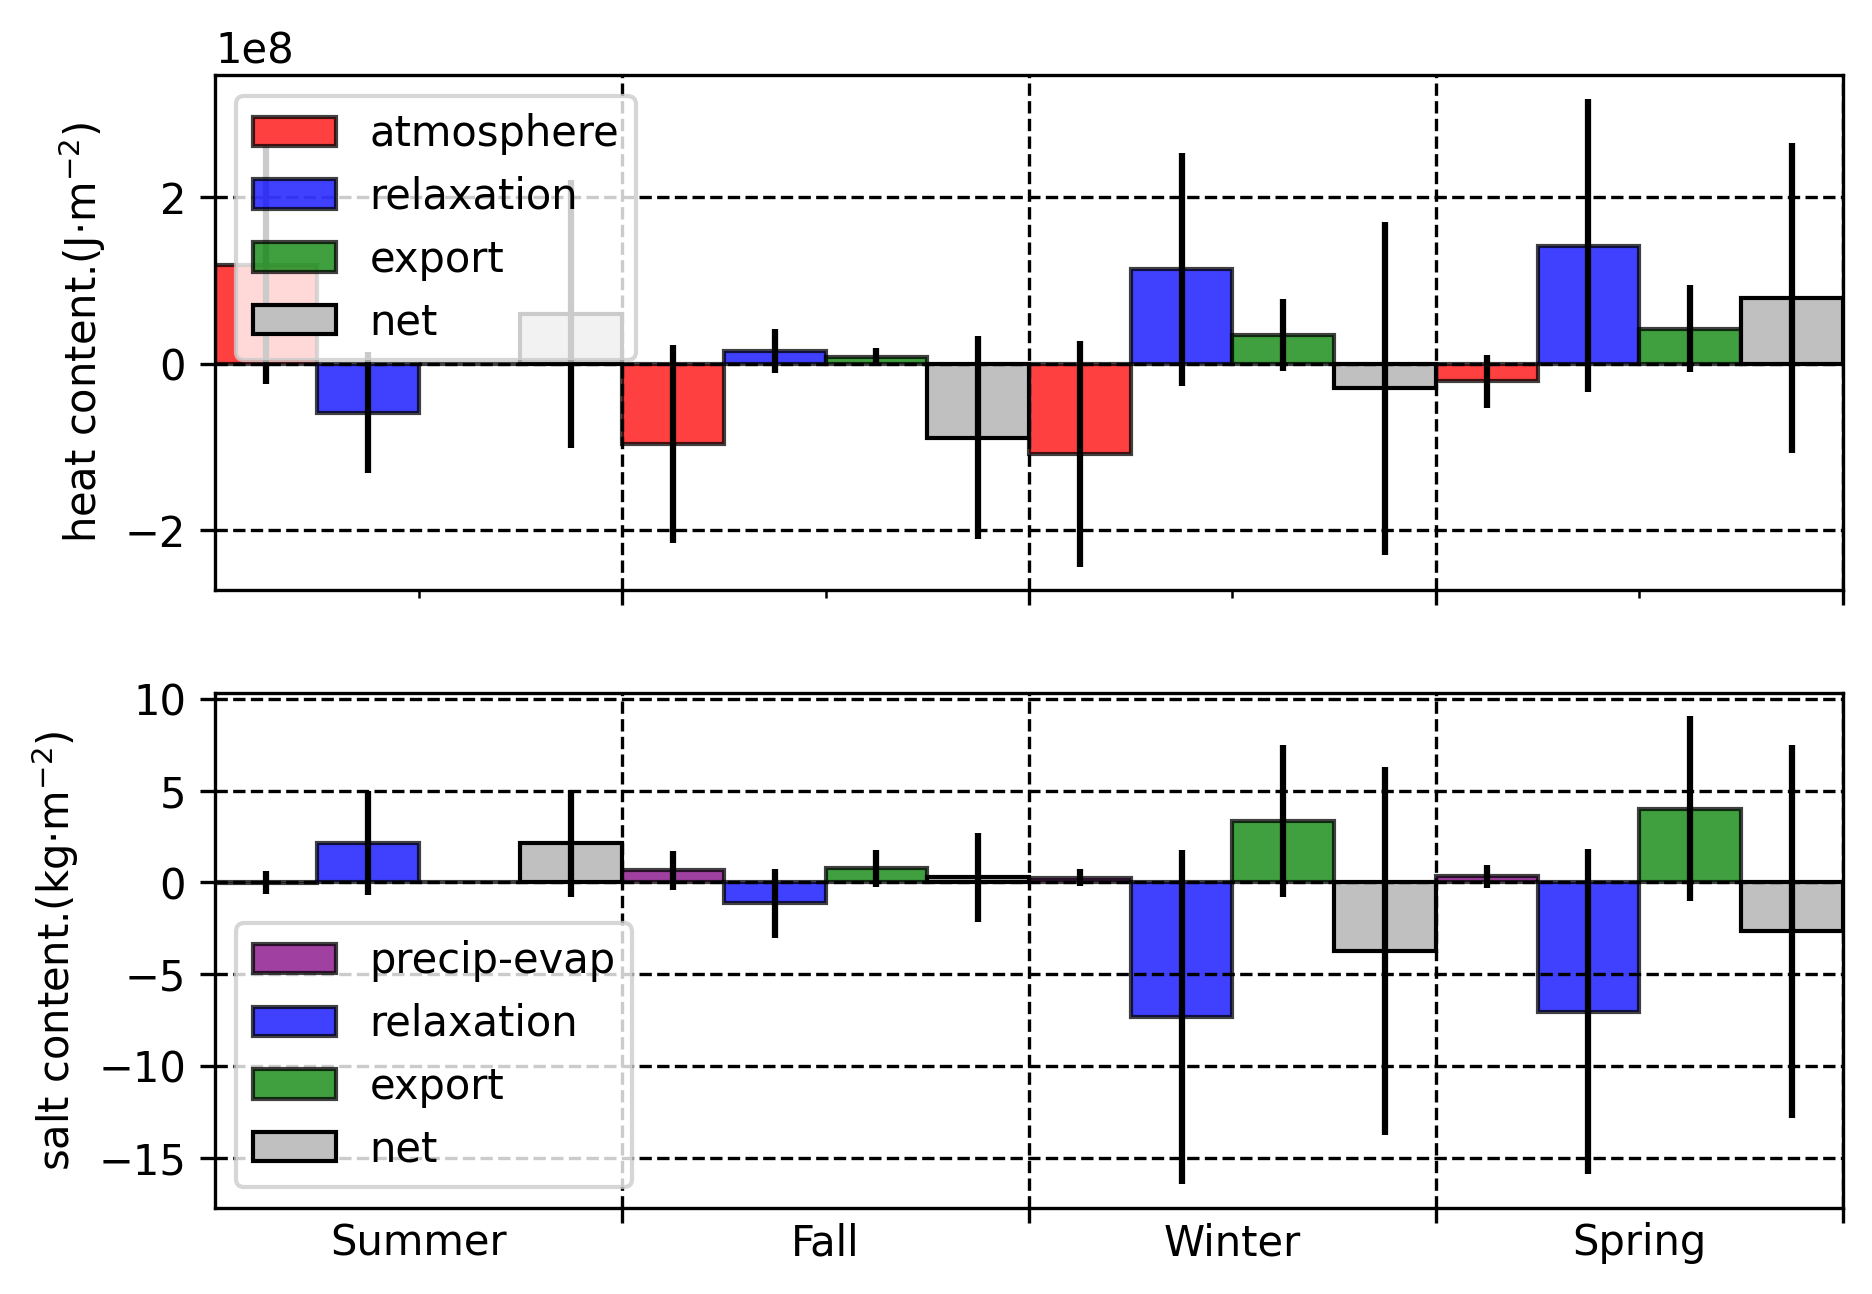

In [19]:
fig,(ax1,ax2) =plt.subplots(2,1,figsize=(7,5),sharex=True,dpi=300)

season=4*np.array([1,2,3,4])
width=1

ax1.bar(season,hs_table.mean(axis=1)*3600,width,yerr=hs_table.std(axis=1)*3600,edgecolor='k',color='red',label='atmosphere',alpha=.75)
ax1.bar(season+width,hr_table.mean(axis=1)*3600,width,yerr=hr_table.std(axis=1)*3600,edgecolor='k',color='blue',label='relaxation',alpha=.75)
ax1.bar(season+2*width,he_table.mean(axis=1)*3600,width,yerr=he_table.std(axis=1)*3600,edgecolor='k',color='green',label='export',alpha=.75)
ax1.bar(season+3*width,(hs_table.mean(axis=1)+hr_table.mean(axis=1)-he_table.mean(axis=1))*3600,width,yerr=np.sqrt((hs_table.std(axis=1)*3600)**2+(hr_table.std(axis=1)*3600)**2+(he_table.std(axis=1)*3600)**2),color='silver',edgecolor='k',label='net')
ax1.set_ylabel(r'heat content.(J$\cdot$m$^{-2}$)')
ax1.legend()
ax1.grid(True,linestyle='--',color='k')


ax2.bar(season,.001*1030*sp_table.mean(axis=1)*3600,width,yerr=.001*1030*sp_table.std(axis=1)*3600,edgecolor='k',color='purple',label='precip-evap',alpha=.75)
ax2.bar(season+width,.001*1030*sr_table.mean(axis=1)*3600,width,yerr=.001*1030*sr_table.std(axis=1)*3600,edgecolor='k',color='blue',label='relaxation',alpha=.75)
ax2.bar(season+2*width,.001*1030*se_table.mean(axis=1)*3600,width,yerr=.001*1030*se_table.std(axis=1)*3600,edgecolor='k',color='green',label='export',alpha=.75)
ax2.bar(season+3*width,((.001*1030*se_table.mean(axis=1)*3600)+(.001*1030*sr_table.mean(axis=1)*3600)+(.001*1030*sp_table.mean(axis=1)*3600)),width,yerr=np.sqrt((.001*1030*se_table.std(axis=1)*3600)**2+(.001*1030*sr_table.std(axis=1)*3600)**2+(.001*1030*sp_table.std(axis=1)*3600)**2),color='silver',edgecolor='k',label='net')
ax2.set_xticks(season+4*width-width/2)
ax2.legend()
ax2.set_ylabel(r'salt content.(kg$\cdot$m$^{-2}$)')
ax2.get_shared_x_axes().join(ax1)
ax2.set_xlim(season[0]-width/2,season[3]+4*width-width/2)

# Hide major tick labels
ax2.set_xticklabels('')
# Customize minor tick labels
ax2.set_xticks(season-2*width+4*width-width/2,minor=True)
ax2.set_xticklabels(('Summer', 'Fall', 'Winter','Spring'),minor=True)
ax2.tick_params(which="minor", axis="x", length=0)

ax2.grid(True,linestyle='--',color='k')


plt.show()

NameError: name 'saltfluxes' is not defined

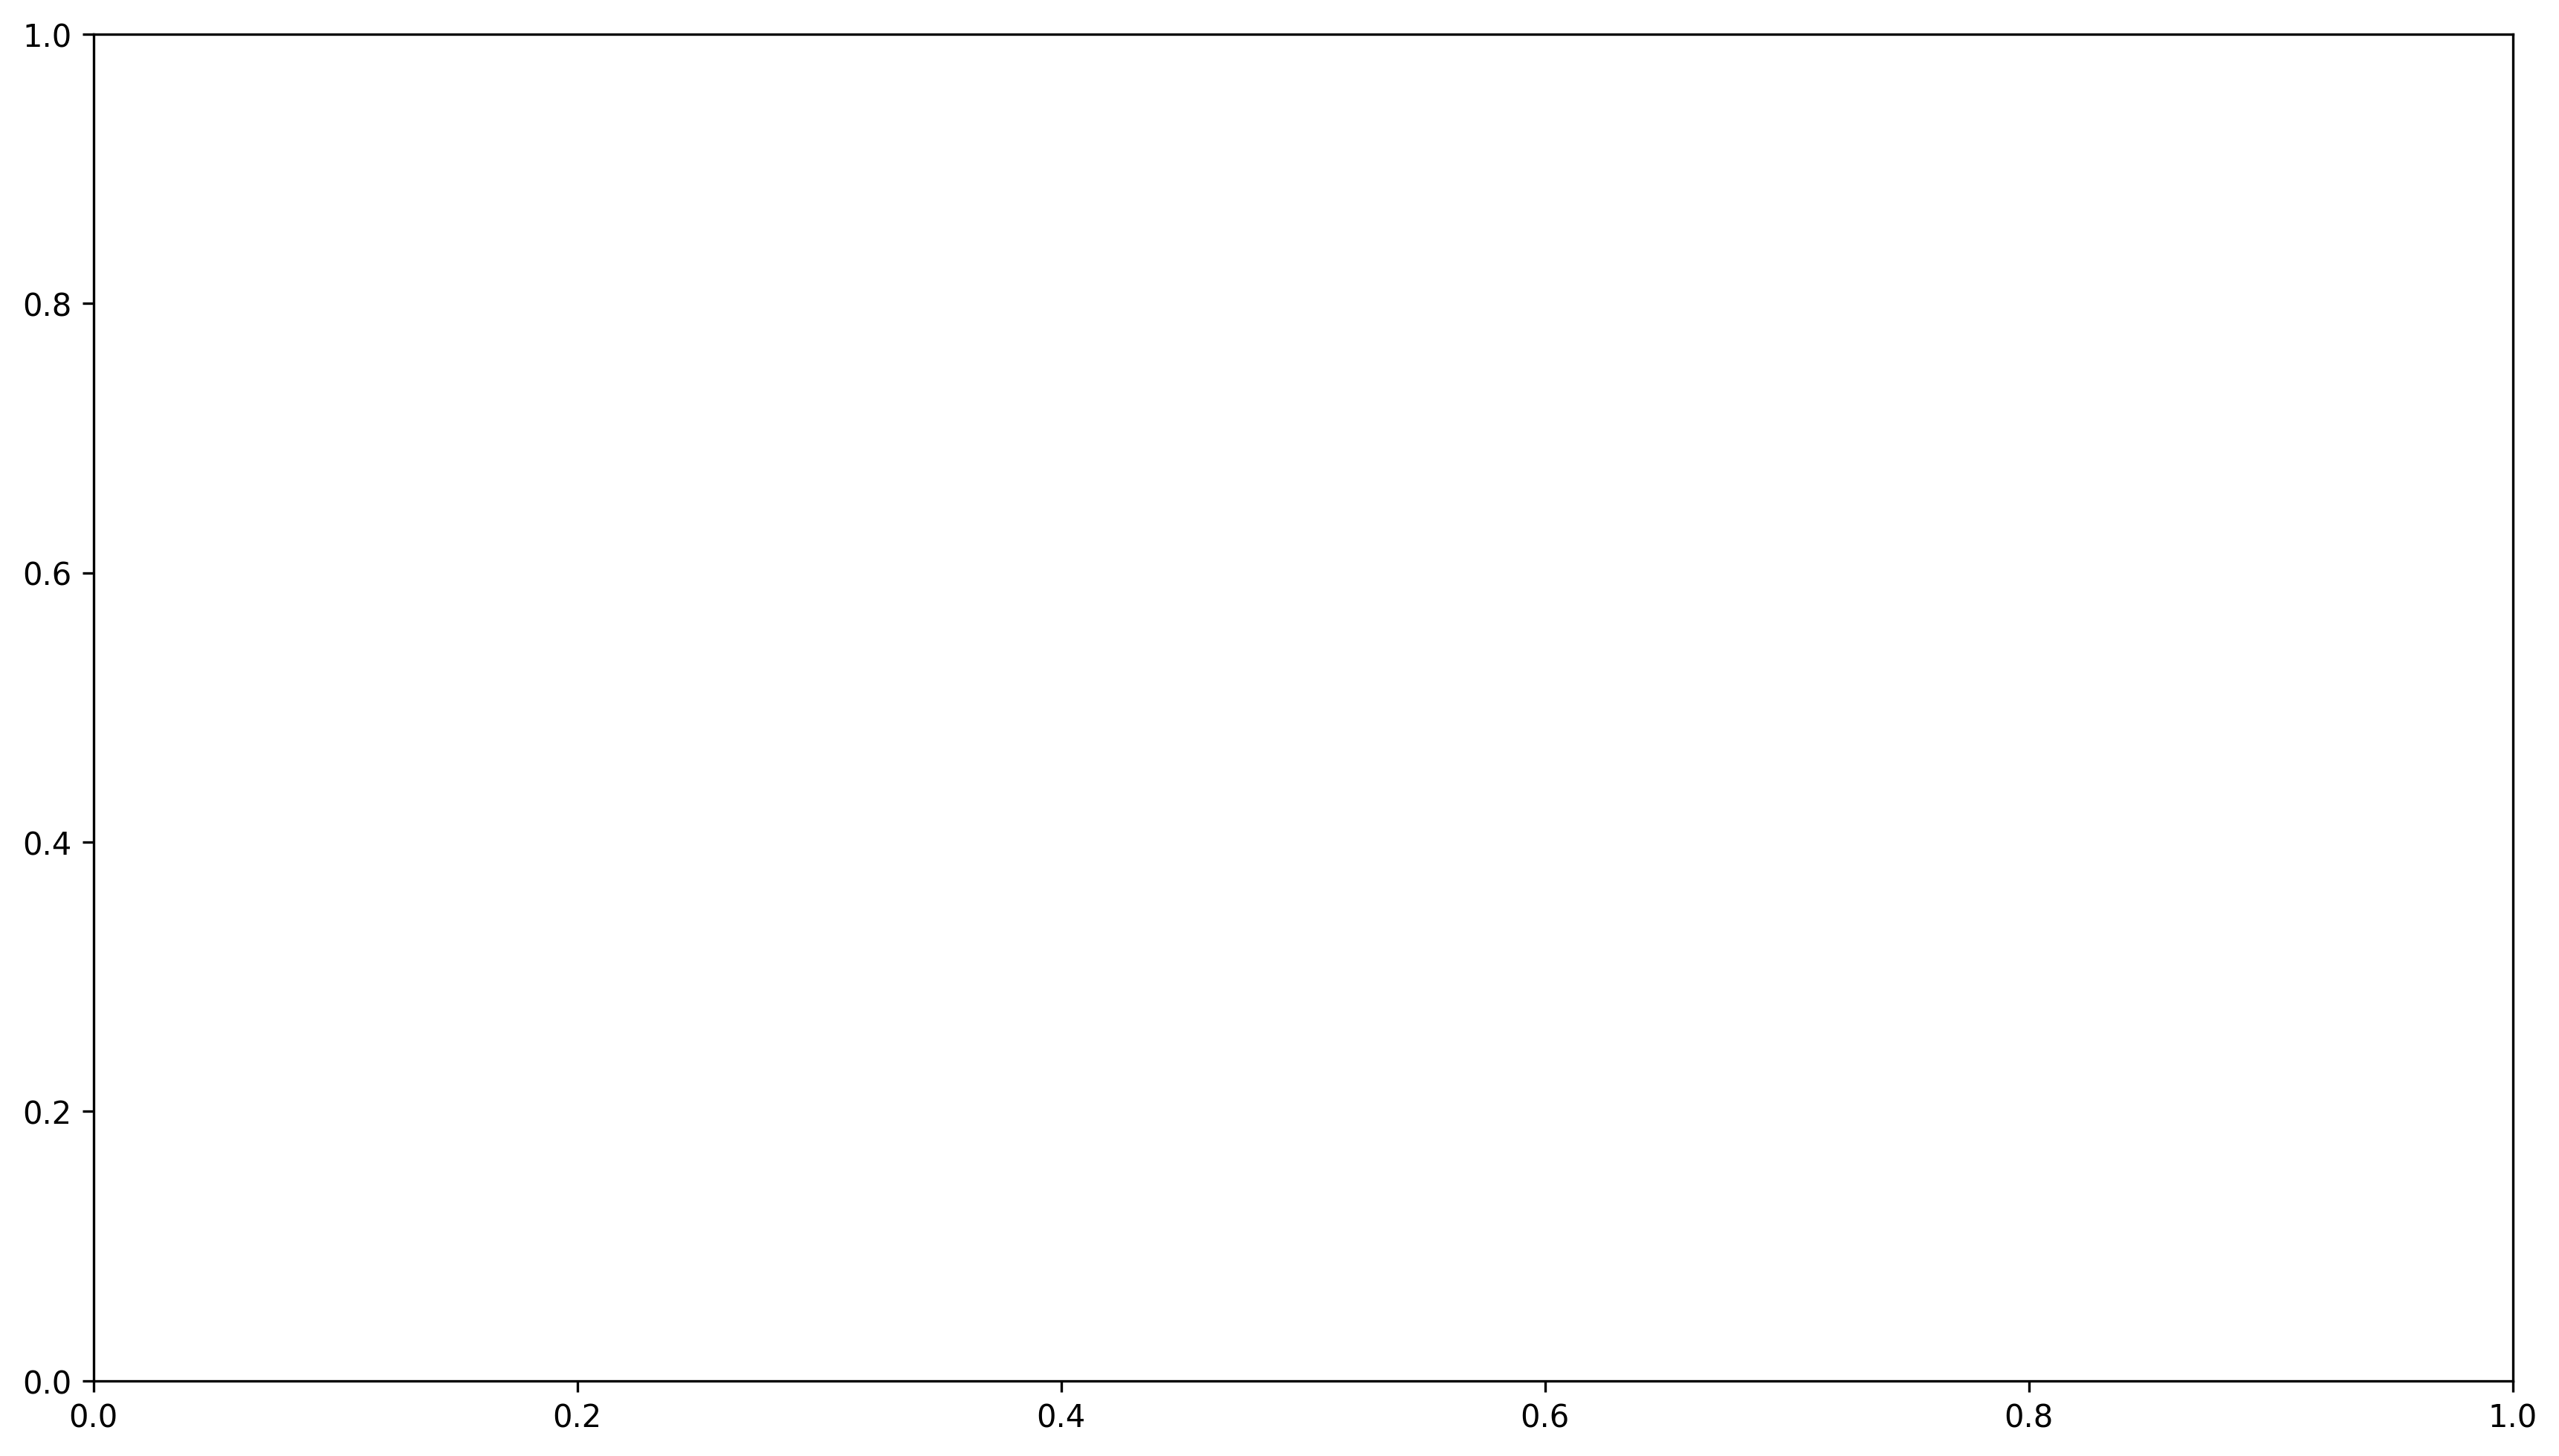

In [25]:
fig,ax =plt.subplots(1,1,figsize=(14,8),sharex=True,dpi=300)


#ax.bar(saltfluxes.index,saltfluxes[0]/1000,width=100)
#ax.bar(saltfluxes.index,saltfluxes[1]/1000,width=100)
#ax.bar(saltfluxes.index,saltfluxes[2]/1000,width=100)
ax.bar(saltfluxes.index,saltfluxes[3]/1000,width=100)

ax.grid(True)

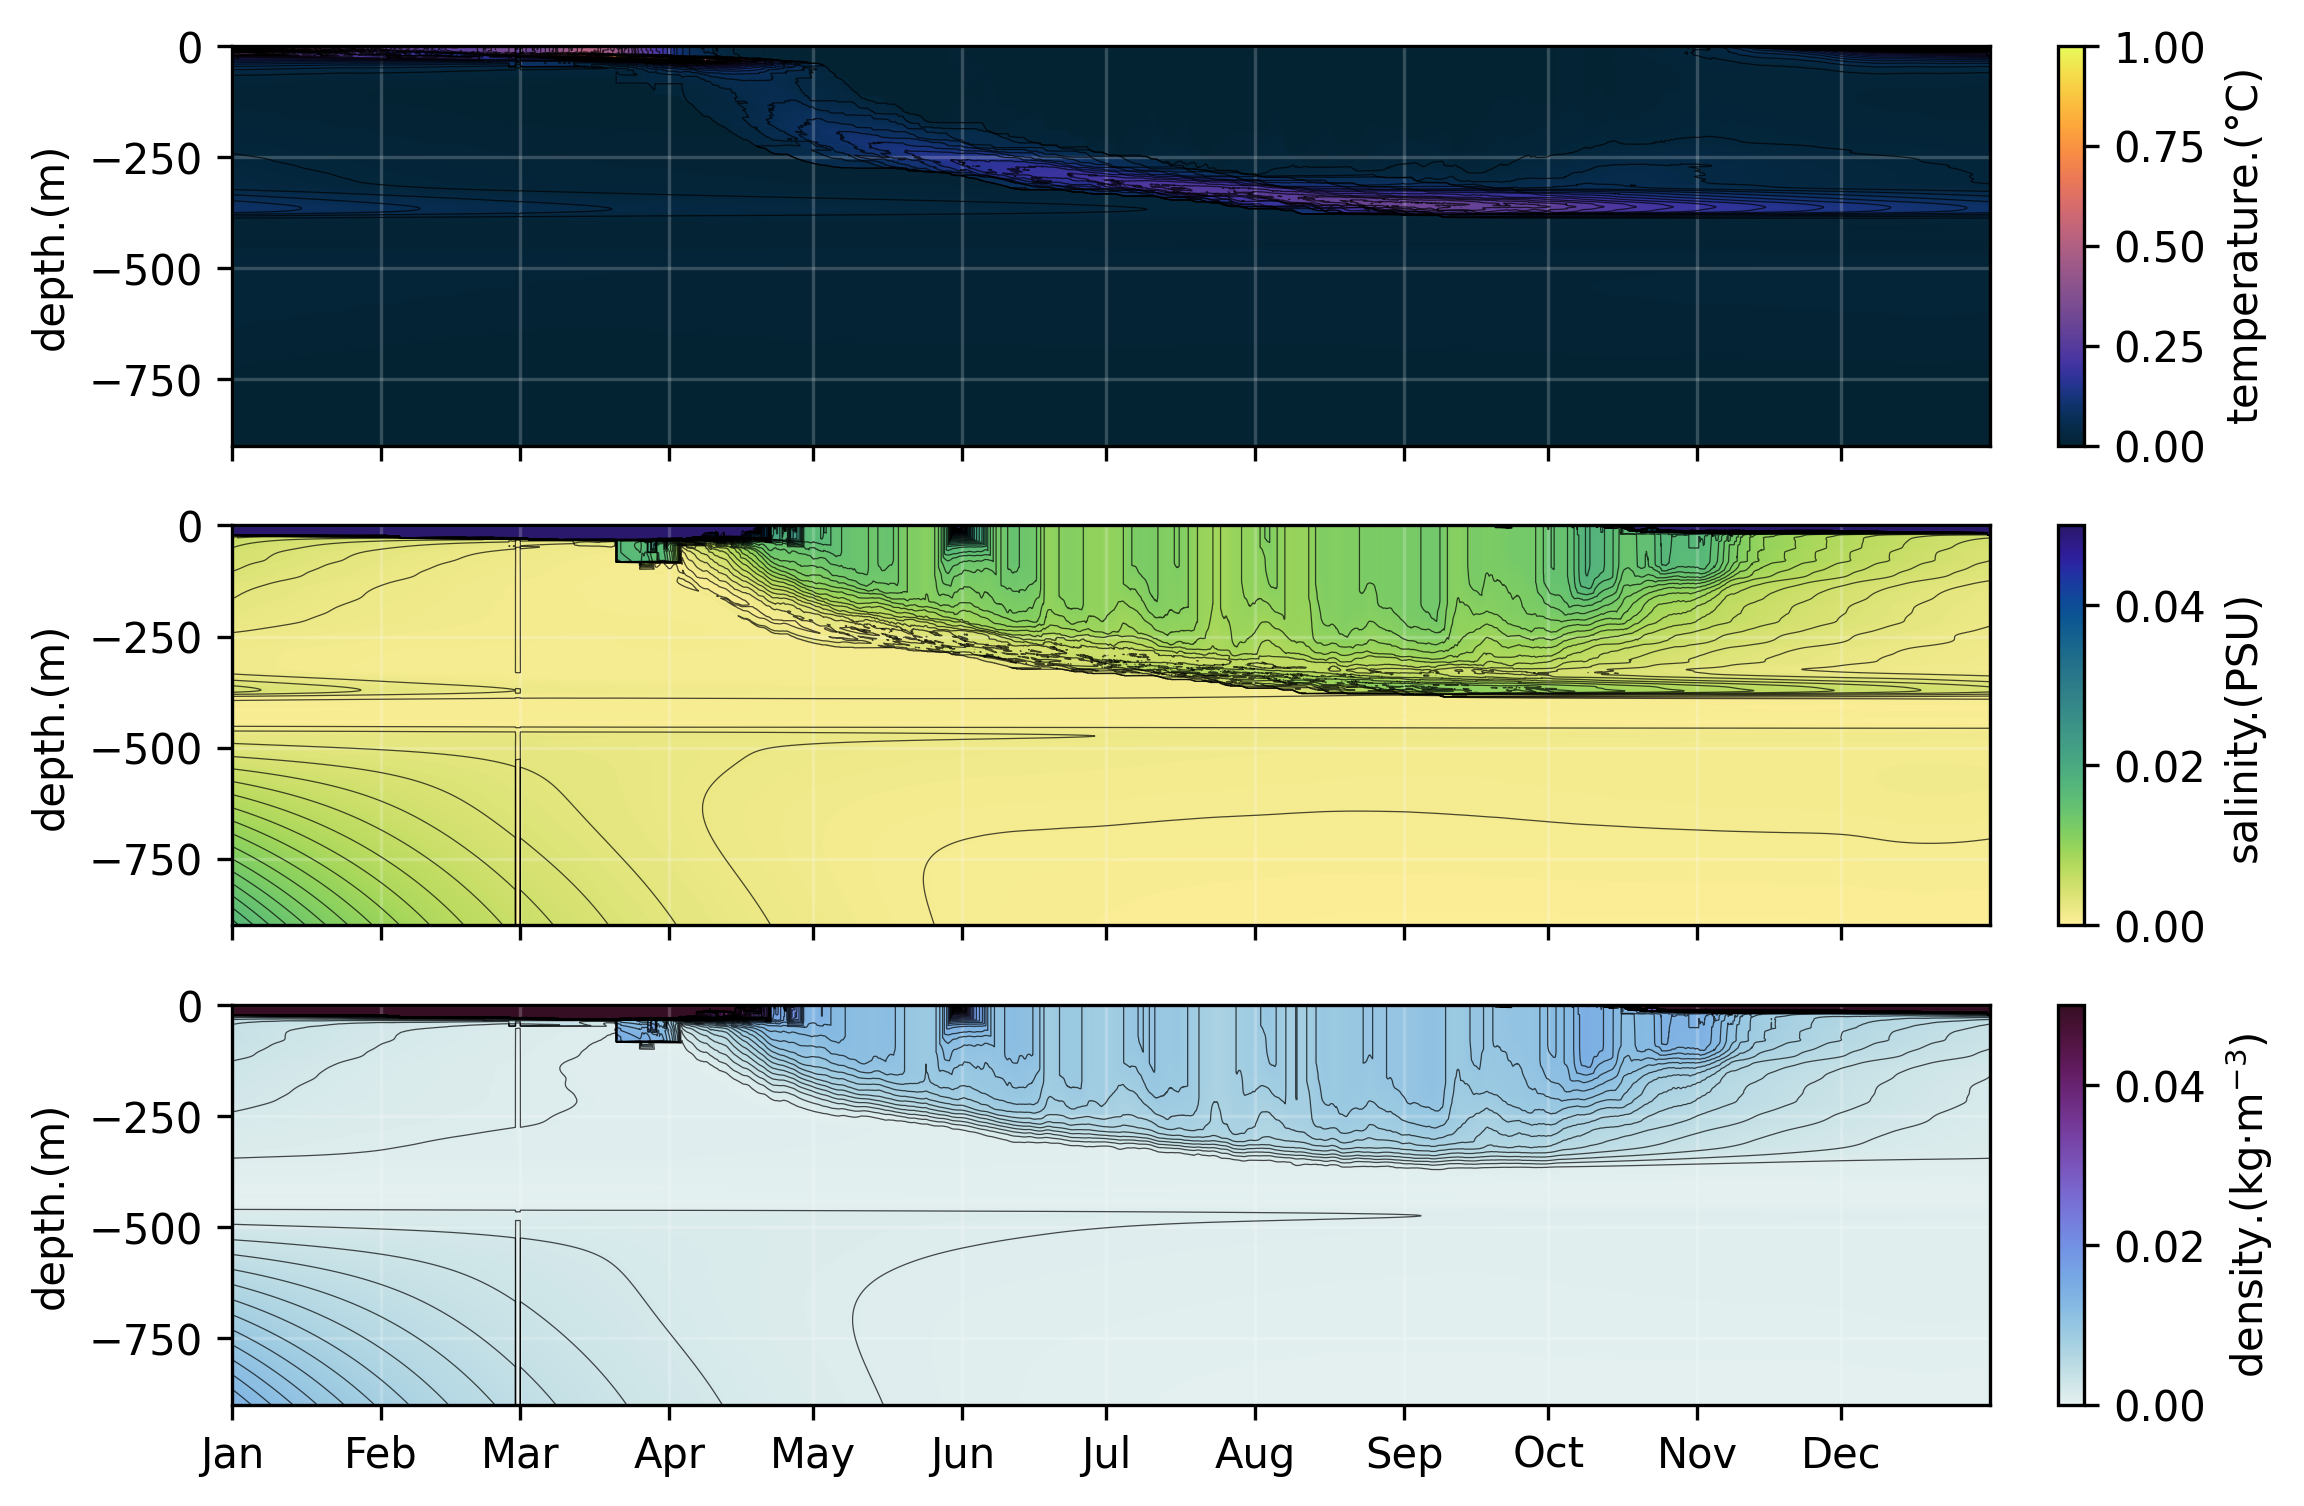

In [35]:
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1 import make_axes_locatable

x1=mdates.date2num(times[0].to_datetime64())
x2=mdates.date2num(times[-1].to_datetime64())
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(8,6),sharex=True,dpi=300)
ax1.contour(np.flipud(temp_std.transpose()),levels=np.arange(0,1,.02),linestyles='solid',colors='black',linewidths=.3,alpha=.7,extent=[x1,x2,-900,0])
img1=ax1.imshow(temp_std.transpose(),cmap=cmocean.cm.thermal,aspect='auto',extent=[x1,x2,-900,0],vmin=0,vmax=1)
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="2.4%", pad=0.2)
cbar1=plt.colorbar(img1,cax=cax1)
cax1.set_aspect(15)

#ax.plot(x,-mld_out,color='white',linestyle='--',linewidth=.3)


ax2.contour(np.flipud(sal_std.transpose()),levels=np.arange(0,.05,.001),linestyles='solid',colors='black',linewidths=.3,alpha=.7,extent=[x1,x2,-900,0])
img2=ax2.imshow(sal_std.transpose(),cmap=cmocean.cm.haline_r,aspect='auto',extent=[x1,x2,-900,0],vmin=0,vmax=.05)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="2.4%", pad=0.2)
cbar2=plt.colorbar(img2,cax=cax2)
cax2.set_aspect(15)


ax3.contour(np.flipud(density_std.transpose()),levels=np.arange(0,.05,.001),linestyles='solid',colors='black',linewidths=.3,alpha=.7,extent=[x1,x2,-900,0])
img3=ax3.imshow(density_std.transpose(),cmap=cmocean.cm.dense,aspect='auto',extent=[x1,x2,-900,0],vmin=0,vmax=.05)
divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes("right", size="2.4%", pad=0.2)
cbar3=plt.colorbar(img3,cax=cax3)
cax3.set_aspect(15)



ax1.set_ylabel('depth.(m)')
ax2.set_ylabel('depth.(m)')
ax3.set_ylabel('depth.(m)')

cbar1.set_label(r'temperature.($\degree$C)')
ax1.xaxis_date()

cbar2.set_label(r'salinity.(PSU)')
ax2.xaxis_date()

cbar3.set_label(r'density.(kg$\cdot$m$^{-3}$)')
ax3.xaxis_date()

date_format = mdates.DateFormatter('%b')

ax3.get_shared_x_axes().join(ax1, ax2, ax3)
ax3.set_xticklabels([])

ax3.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
ax1.grid(color='white', linestyle='-',alpha=.2)
ax2.grid(color='white', linestyle='-',alpha=.2)
ax3.grid(color='white', linestyle='-',alpha=.2)
plt.show()

In [24]:
temp_mean=temperature_df.groupby([(temperature_df.index.month)]).mean()
temp_std=temperature_df.groupby([(temperature_df.index.month)]).std()

In [38]:
temp_mean.to_numpy().shape

(12, 1800)

In [58]:
colormap = plt.get_cmap('hsv')

In [59]:
colormap

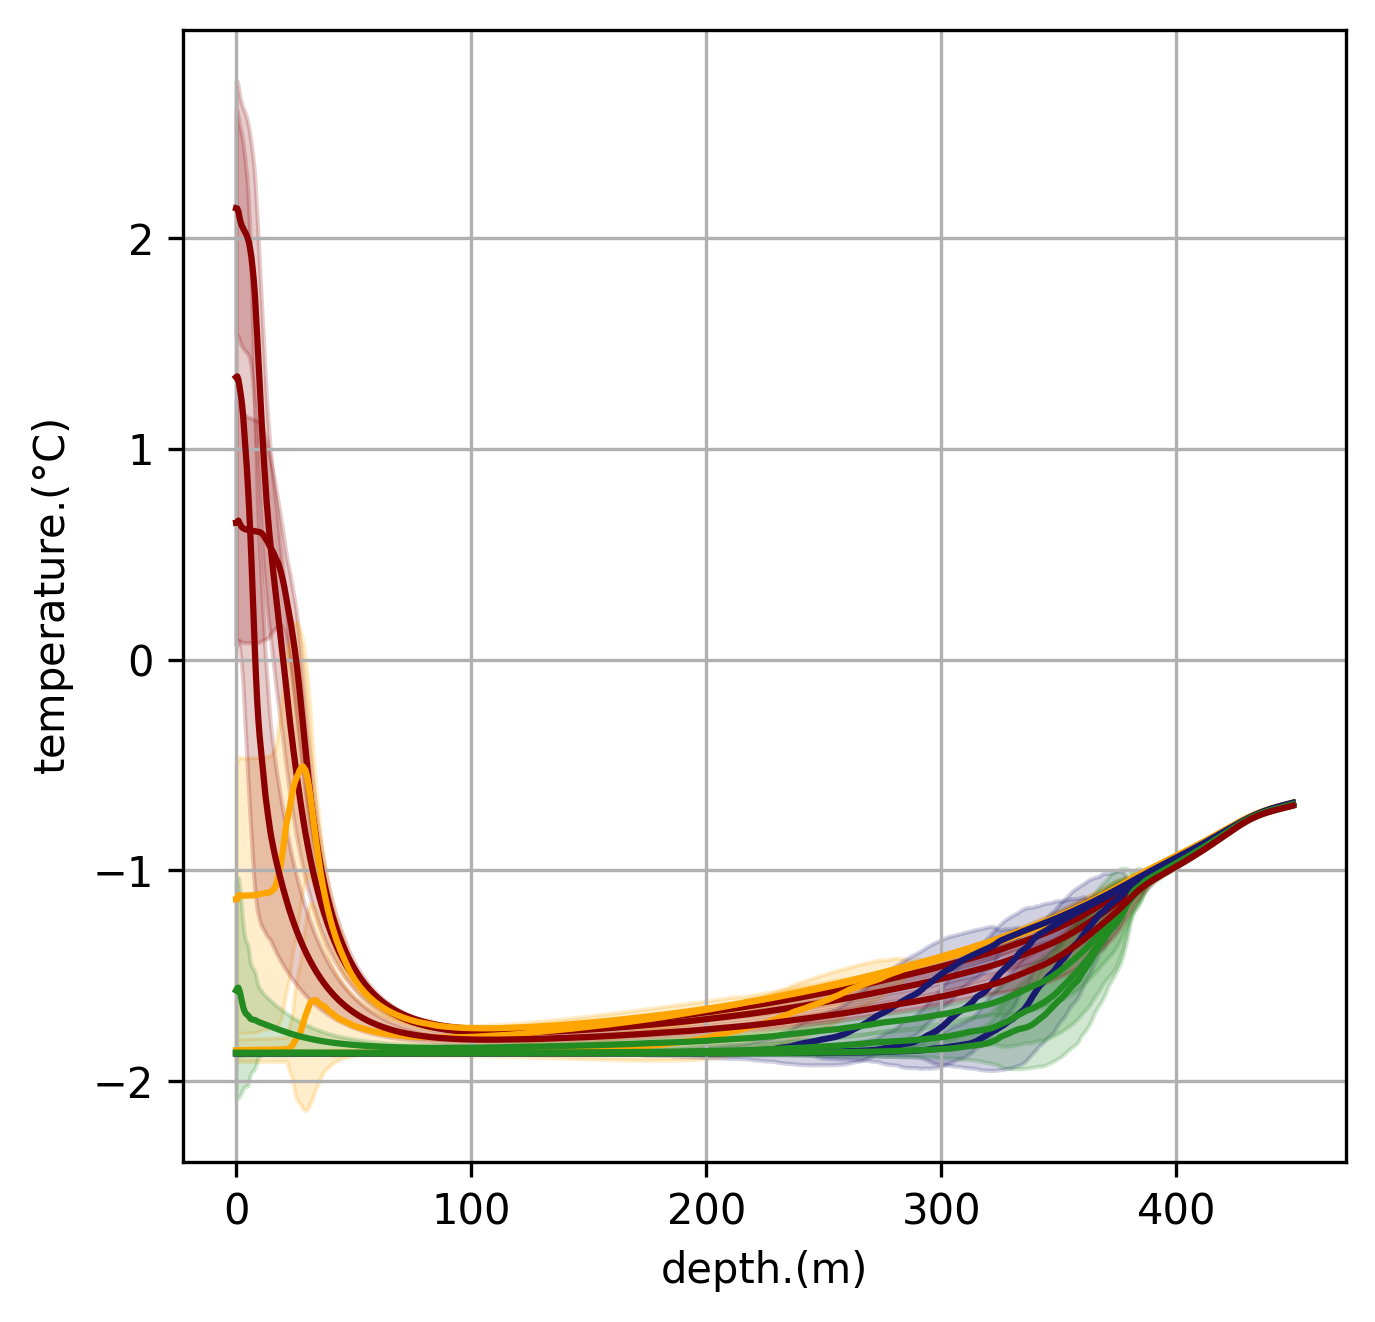

In [68]:
fig,ax=plt.subplots(figsize=(5, 5),dpi=300)

for i in range(12):
    if i<2 or i==11:
        colors='darkred'
    if i>1 and i<5:
        colors='orange'
    if i>4 and i<8:
        colors='midnightblue'
    if i>7 and i<11:
        colors='forestgreen'
    
    ax.plot(z[:900],temp_mean.to_numpy()[i,:900],color=colors)
    ax.fill_between(z[:900],temp_mean.to_numpy()[i,:900]-temp_std.to_numpy()[i,:900],temp_mean.to_numpy()[i,:900]+temp_std.to_numpy()[i,:900],color=colors,alpha=0.2)
ax.grid()
ax.set_ylabel(r"temperature.($\degree$C)")
ax.set_xlabel(r"depth.(m)")
plt.show()

In [18]:
density = sw.dens0(S_relax, T_relax)
uvel = np.zeros(len(S_relax))
vvel = np.zeros(len(S_relax))

temperature_out = np.zeros((len(S_relax),len(data19791990['Time(year)'])))
salinity_out = np.zeros((len(S_relax),len(data19791990['Time(year)'])))
density_out = np.zeros((len(S_relax),len(data19791990['Time(year)'])))
vel_relax_out = np.zeros((len(S_relax),len(data19791990['Time(year)'])))
uvel_out = np.zeros((len(S_relax),len(data19791990['Time(year)'])))
vvel_out = np.zeros((len(S_relax),len(data19791990['Time(year)'])))
mld_out = np.zeros(len(data19791990['Time(year)']))
sea_ice_thickness_out = np.zeros(len(data19791990['Time(year)']))
sea_ice_concentration_out = np.zeros(len(data19791990['Time(year)']))
ocean_temperature_out = np.zeros(len(data19791990['Time(year)']))
ice_temperature_out = np.zeros(len(data19791990['Time(year)']))
flux_in_out = np.zeros(len(data19791990['Time(year)']))

intial_thickness=0.1
initial_concentration=0.0

temperature, salinity, density, uvel, vvel, mld, sea_ice_thickness, sea_ice_concentration, ocean_surface_temperature, ice_surface_temperature, flux_in, v_relax = model.icey_pwp(intial_thickness,initial_concentration,T_relax,S_relax,T_relax,S_relax,density,uvel,vvel,data19791990['Mean_East_Turbulent_Shear_Stress(Ns/m2)'][0],data19791990['Mean_North_Turbulent_Shear_Stress(Ns/m2)'][0],z,data19791990['Mean_DW_SW_Flux(W/m2)'][0],data19791990['Mean_DW_LW_Flux(W/m2)'][0],data19791990['Temp_2m(K)'][0],data19791990['Temp_2m(K)'][0],data19791990['Surface_Pressure(Pa)'][0]/1000.0,data19791990['wind_speed(m/s)'][0],data19791990['Specific_Humidity_2m(kg/kg)'][0],data19791990['Mean_Total_Precip_Rate(kg/m2s)'][0],1.5e-3,0.0,3600)


for i in tqdm(range(0,len(data19791990['Time(year)']))):
    temperature, salinity, density, uvel, vvel, mld, sea_ice_thickness, sea_ice_concentration, ocean_surface_temperature, ice_surface_temperature, flux_in, v_relax = model.icey_pwp(sea_ice_thickness,sea_ice_concentration,T_relax,S_relax,temperature,salinity,density,uvel,vvel,data19791990['Mean_East_Turbulent_Shear_Stress(Ns/m2)'][i],data19791990['Mean_North_Turbulent_Shear_Stress(Ns/m2)'][i],z,data19791990['Mean_DW_SW_Flux(W/m2)'][i],data19791990['Mean_DW_LW_Flux(W/m2)'][i],data19791990['Temp_2m(K)'][i],data19791990['Temp_2m(K)'][i],data19791990['Surface_Pressure(Pa)'][i]/1000.0,data19791990['wind_speed(m/s)'][i],data19791990['Specific_Humidity_2m(kg/kg)'][i],data19791990['Mean_Total_Precip_Rate(kg/m2s)'][i],1.5e-3,0.0,3600)
    temperature_out[:,i] = temperature.copy() 
    salinity_out[:,i] = salinity.copy()
    density_out[:,i] = density.copy()
    uvel_out[:,i] = uvel.copy()
    vvel_out[:,i] = vvel.copy()
    mld_out[i] =  mld.copy()
    sea_ice_thickness_out[i] = sea_ice_thickness.copy()
    sea_ice_concentration_out[i] = sea_ice_concentration.copy()
    ocean_temperature_out[i] = ocean_surface_temperature.copy()
    ice_temperature_out[i] = ice_surface_temperature.copy()
    flux_in_out[i]=flux_in.copy()
    vel_relax_out[:,i] = v_relax.copy()
    

100%|██████████| 8760/8760 [04:38<00:00, 31.48it/s] 


In [18]:
temperature_out = np.zeros((len(S_relax),len(data19912000['Time(year)'])))
salinity_out = np.zeros((len(S_relax),len(data19912000['Time(year)'])))
density_out = np.zeros((len(S_relax),len(data19912000['Time(year)'])))
vel_relax_out = np.zeros((len(S_relax),len(data19912000['Time(year)'])))
uvel_out = np.zeros((len(S_relax),len(data19912000['Time(year)'])))
vvel_out = np.zeros((len(S_relax),len(data19912000['Time(year)'])))
mld_out = np.zeros(len(data19912000['Time(year)']))
sea_ice_thickness_out = np.zeros(len(data19912000['Time(year)']))
sea_ice_concentration_out = np.zeros(len(data19912000['Time(year)']))
ocean_temperature_out = np.zeros(len(data19912000['Time(year)']))
ice_temperature_out = np.zeros(len(data19912000['Time(year)']))
flux_in_out = np.zeros(len(data19912000['Time(year)']))

#intial_thickness=0.1
#initial_concentration=0.2

#temperature, salinity, density, uvel, vvel, mld, sea_ice_thickness, sea_ice_concentration, ocean_surface_temperature, ice_surface_temperature, flux_in, v_relax = model.icey_pwp(intial_thickness,initial_concentration,T_relax,S_relax,T_relax,S_relax,density,uvel,vvel,data19791990['Mean_East_Turbulent_Shear_Stress(Ns/m2)'][0],data19791990['Mean_North_Turbulent_Shear_Stress(Ns/m2)'][0],z,data19791990['Mean_DW_SW_Flux(W/m2)'][0],data19791990['Mean_DW_LW_Flux(W/m2)'][0],data19791990['Temp_2m(K)'][0],data19791990['Temp_2m(K)'][0],data19791990['Surface_Pressure(Pa)'][0]/1000.0,data19791990['wind_speed(m/s)'][0],data19791990['1000hPa_Specific_Humidity(kg/kg)'][0],5e-3,0.0,3600)


for i in tqdm(range(len(data19912000['Time(year)']))):
    temperature, salinity, density, uvel, vvel, mld, sea_ice_thickness, sea_ice_concentration, ocean_surface_temperature, ice_surface_temperature, flux_in, v_relax = model.icey_pwp(sea_ice_thickness,sea_ice_concentration,T_relax,S_relax,temperature,salinity,density,uvel,vvel,data19912000['Mean_East_Turbulent_Shear_Stress(Ns/m2)'][i],data19912000['Mean_North_Turbulent_Shear_Stress(Ns/m2)'][i],z,data19912000['Mean_DW_SW_Flux(W/m2)'][i],data19912000['Mean_DW_LW_Flux(W/m2)'][i],data19912000['Temp_2m(K)'][i],data19912000['Temp_2m(K)'][i],data19912000['Surface_Pressure(Pa)'][i]/1000.0,data19912000['wind_speed(m/s)'][i],data19912000['1000hPa_Specific_Humidity(kg/kg)'][i],data19912000['Mean_Total_Precip_Rate(kg/m2s)'][i],1e-3,0.0,3600)
    temperature_out[:,i] = temperature.copy() 
    salinity_out[:,i] = salinity.copy()
    density_out[:,i] = density.copy()
    uvel_out[:,i] = uvel.copy()
    vvel_out[:,i] = vvel.copy()
    mld_out[i] =  mld.copy()
    sea_ice_thickness_out[i] = sea_ice_thickness.copy()
    sea_ice_concentration_out[i] = sea_ice_concentration.copy()
    ocean_temperature_out[i] = ocean_surface_temperature.copy()
    ice_temperature_out[i] = ice_surface_temperature.copy()
    flux_in_out[i]=flux_in.copy()
    vel_relax_out[:,i] = v_relax.copy()

100%|██████████| 87672/87672 [34:34<00:00, 42.26it/s]  


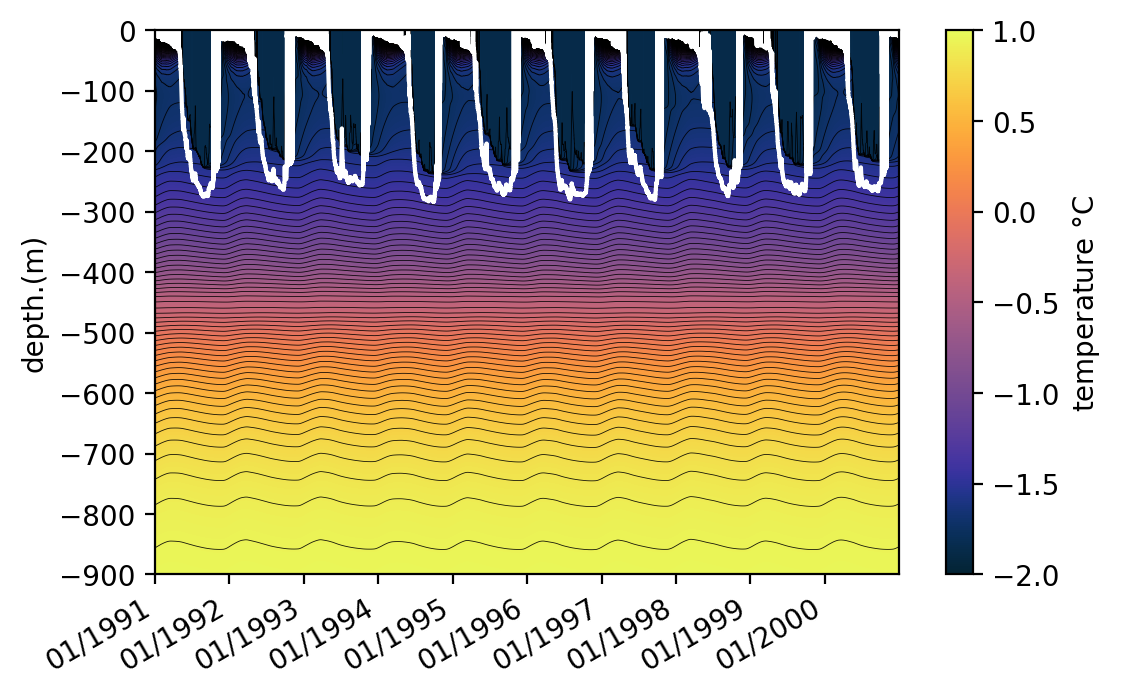

In [19]:
import matplotlib.dates as mdates

x1=mdates.date2num(data19912000.index[0].to_datetime64())
x2=mdates.date2num(data19912000.index[-1].to_datetime64())
x=mdates.date2num(np.array(data19912000.index.to_pydatetime(), dtype=np.datetime64))

fig,ax=plt.subplots(dpi=200)
ax.contour(np.flipud(temperature_out),levels=np.arange(-2,1.0,.05),linestyles='solid',colors='black',linewidths=.3,alpha=.9,extent=[x1,x2,-900,0])
img=ax.imshow(temperature_out,cmap=cmocean.cm.thermal,aspect='auto',extent=[x1,x2,-900,0],vmin=-2.0,vmax=1.0)
cbar=plt.colorbar(img)
ax.plot(x,-mld_out,c='white')
ax.set_ylabel('depth.(m)')
cbar.set_label(r'temperature $\degree$C')
ax.xaxis_date()
date_format = mdates.DateFormatter('%m/%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

plt.show()

In [20]:
#density = sw.dens0(S_relax, T_relax)
#uvel = np.zeros(len(S_relax))
#vvel = np.zeros(len(S_relax))

temperature_out = np.zeros((len(S_relax),len(data20012010['Time(year)'])))
salinity_out = np.zeros((len(S_relax),len(data20012010['Time(year)'])))
density_out = np.zeros((len(S_relax),len(data20012010['Time(year)'])))
vel_relax_out = np.zeros((len(S_relax),len(data20012010['Time(year)'])))
uvel_out = np.zeros((len(S_relax),len(data20012010['Time(year)'])))
vvel_out = np.zeros((len(S_relax),len(data20012010['Time(year)'])))
mld_out = np.zeros(len(data20012010['Time(year)']))
sea_ice_thickness_out = np.zeros(len(data20012010['Time(year)']))
sea_ice_concentration_out = np.zeros(len(data20012010['Time(year)']))
ocean_temperature_out = np.zeros(len(data20012010['Time(year)']))
ice_temperature_out = np.zeros(len(data20012010['Time(year)']))
flux_in_out = np.zeros(len(data20012010['Time(year)']))

#intial_thickness=0.1
#initial_concentration=0.2

#temperature, salinity, density, uvel, vvel, mld, sea_ice_thickness, sea_ice_concentration, ocean_surface_temperature, ice_surface_temperature, flux_in, v_relax = model.icey_pwp(intial_thickness,initial_concentration,T_relax,S_relax,T_relax,S_relax,density,uvel,vvel,data19791990['Mean_East_Turbulent_Shear_Stress(Ns/m2)'][0],data19791990['Mean_North_Turbulent_Shear_Stress(Ns/m2)'][0],z,data19791990['Mean_DW_SW_Flux(W/m2)'][0],data19791990['Mean_DW_LW_Flux(W/m2)'][0],data19791990['Temp_2m(K)'][0],data19791990['Temp_2m(K)'][0],data19791990['Surface_Pressure(Pa)'][0]/1000.0,data19791990['wind_speed(m/s)'][0],data19791990['1000hPa_Specific_Humidity(kg/kg)'][0],5e-3,0.0,3600)


for i in tqdm(range(len(data20012010['Time(year)']))):
    temperature, salinity, density, uvel, vvel, mld, sea_ice_thickness, sea_ice_concentration, ocean_surface_temperature, ice_surface_temperature, flux_in, v_relax = model.icey_pwp(sea_ice_thickness,sea_ice_concentration,T_relax,S_relax,temperature,salinity,density,uvel,vvel,data20012010['Mean_East_Turbulent_Shear_Stress(Ns/m2)'][i],data20012010['Mean_North_Turbulent_Shear_Stress(Ns/m2)'][i],z,data20012010['Mean_DW_SW_Flux(W/m2)'][i],data20012010['Mean_DW_LW_Flux(W/m2)'][i],data20012010['Temp_2m(K)'][i],data20012010['Temp_2m(K)'][i],data20012010['Surface_Pressure(Pa)'][i]/1000.0,data20012010['wind_speed(m/s)'][i],data20012010['1000hPa_Specific_Humidity(kg/kg)'][i],data20012010['Mean_Total_Precip_Rate(kg/m2s)'][i],1e-3,0.0,3600)
    temperature_out[:,i] = temperature.copy() 
    salinity_out[:,i] = salinity.copy()
    density_out[:,i] = density.copy()
    uvel_out[:,i] = uvel.copy()
    vvel_out[:,i] = vvel.copy()
    mld_out[i] =  mld.copy()
    sea_ice_thickness_out[i] = sea_ice_thickness.copy()
    sea_ice_concentration_out[i] = sea_ice_concentration.copy()
    ocean_temperature_out[i] = ocean_surface_temperature.copy()
    ice_temperature_out[i] = ice_surface_temperature.copy()
    flux_in_out[i]=flux_in.copy()
    vel_relax_out[:,i] = v_relax.copy()

100%|██████████| 87648/87648 [35:38<00:00, 40.98it/s]  


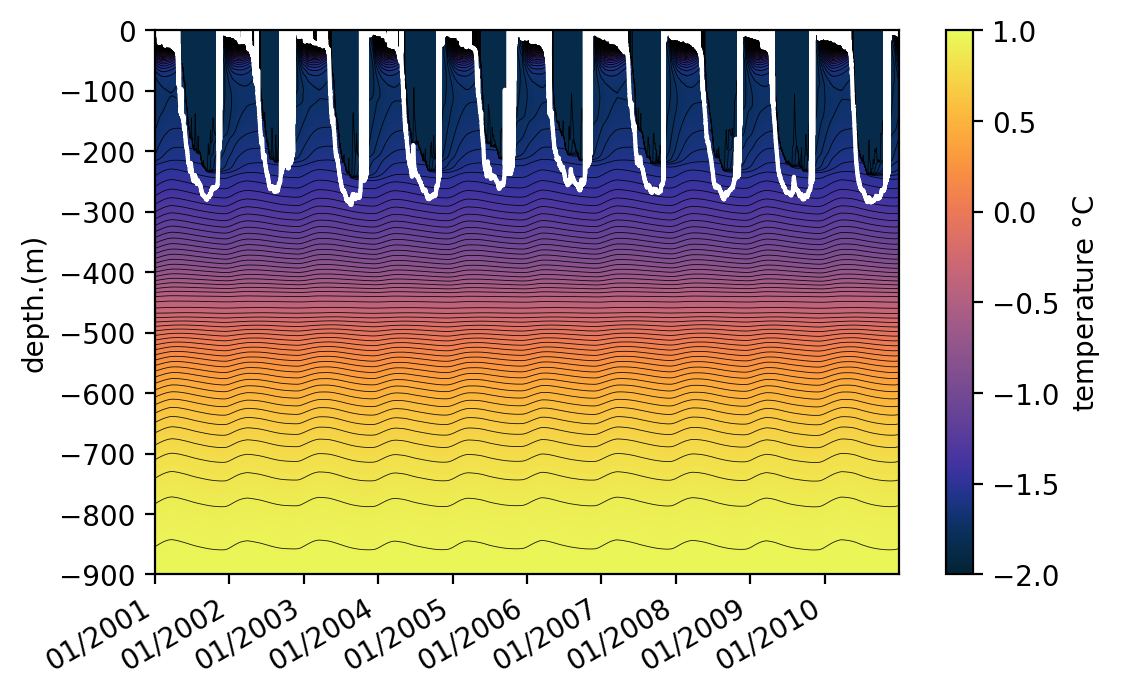

In [21]:
import matplotlib.dates as mdates

x1=mdates.date2num(data20012010.index[0].to_datetime64())
x2=mdates.date2num(data20012010.index[-1].to_datetime64())
x=mdates.date2num(np.array(data20012010.index.to_pydatetime(), dtype=np.datetime64))

fig,ax=plt.subplots(dpi=200)
ax.contour(np.flipud(temperature_out),levels=np.arange(-2,1.0,.05),linestyles='solid',colors='black',linewidths=.3,alpha=.9,extent=[x1,x2,-900,0])
img=ax.imshow(temperature_out,cmap=cmocean.cm.thermal,aspect='auto',extent=[x1,x2,-900,0],vmin=-2.0,vmax=1.0)
cbar=plt.colorbar(img)
ax.plot(x,-mld_out,c='white')
ax.set_ylabel('depth.(m)')
cbar.set_label(r'temperature $\degree$C')
ax.xaxis_date()
date_format = mdates.DateFormatter('%m/%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

plt.show()

In [23]:
density = sw.dens0(S_relax, T_relax)
uvel = np.zeros(len(S_relax))
vvel = np.zeros(len(S_relax))

temperature_out = np.zeros((len(S_relax),len(data20112020['Time(year)'])))
salinity_out = np.zeros((len(S_relax),len(data20112020['Time(year)'])))
density_out = np.zeros((len(S_relax),len(data20112020['Time(year)'])))
vel_relax_out = np.zeros((len(S_relax),len(data20112020['Time(year)'])))
uvel_out = np.zeros((len(S_relax),len(data20112020['Time(year)'])))
vvel_out = np.zeros((len(S_relax),len(data20112020['Time(year)'])))
mld_out = np.zeros(len(data20012010['Time(year)']))
sea_ice_thickness_out = np.zeros(len(data20112020['Time(year)']))
sea_ice_concentration_out = np.zeros(len(data20112020['Time(year)']))
ocean_temperature_out = np.zeros(len(data20112020['Time(year)']))
ice_temperature_out = np.zeros(len(data20112020['Time(year)']))
flux_in_out = np.zeros(len(data20112020['Time(year)']))

#intial_thickness=0.1
#initial_concentration=0.0

#temperature, salinity, density, uvel, vvel, mld, sea_ice_thickness, sea_ice_concentration, ocean_surface_temperature, ice_surface_temperature, flux_in, v_relax = model.icey_pwp(intial_thickness,initial_concentration,T_relax,S_relax,T_relax,S_relax,density,uvel,vvel,data20112020['Mean_East_Turbulent_Shear_Stress(Ns/m2)'][0],data20112020['Mean_North_Turbulent_Shear_Stress(Ns/m2)'][0],z,data20112020['Mean_DW_SW_Flux(W/m2)'][0],data20112020['Mean_DW_LW_Flux(W/m2)'][0],data19791990['Temp_2m(K)'][0],data20112020['Temp_2m(K)'][0],data20112020['Surface_Pressure(Pa)'][0]/1000.0,data20112020['wind_speed(m/s)'][0],data20112020['1000hPa_Specific_Humidity(kg/kg)'][0],data20112020['Mean_Total_Precip_Rate(kg/m2s)'][0],5e-3,0.0,3600)


for i in tqdm(range(len(data20112020['Time(year)']))):
    temperature, salinity, density, uvel, vvel, mld, sea_ice_thickness, sea_ice_concentration, ocean_surface_temperature, ice_surface_temperature, flux_in, v_relax = model.icey_pwp(sea_ice_thickness,sea_ice_concentration,T_relax,S_relax,temperature,salinity,density,uvel,vvel,data20112020['Mean_East_Turbulent_Shear_Stress(Ns/m2)'][i],data20112020['Mean_North_Turbulent_Shear_Stress(Ns/m2)'][i],z,data20112020['Mean_DW_SW_Flux(W/m2)'][i],data20112020['Mean_DW_LW_Flux(W/m2)'][i],data20112020['Temp_2m(K)'][i],data20112020['Temp_2m(K)'][i],data20112020['Surface_Pressure(Pa)'][i]/1000.0,data20112020['wind_speed(m/s)'][i],data20112020['1000hPa_Specific_Humidity(kg/kg)'][i],data20112020['Mean_Total_Precip_Rate(kg/m2s)'][i],1e-3,0.0,3600)
    temperature_out[:,i] = temperature.copy() 
    salinity_out[:,i] = salinity.copy()
    density_out[:,i] = density.copy()
    uvel_out[:,i] = uvel.copy()
    vvel_out[:,i] = vvel.copy()
    mld_out[i] =  mld.copy()
    sea_ice_thickness_out[i] = sea_ice_thickness.copy()
    sea_ice_concentration_out[i] = sea_ice_concentration.copy()
    ocean_temperature_out[i] = ocean_surface_temperature.copy()
    ice_temperature_out[i] = ice_surface_temperature.copy()
    flux_in_out[i]=flux_in.copy()
    vel_relax_out[:,i] = v_relax.copy()

100%|█████████▉| 87648/87672 [34:05<00:00, 42.84it/s]  


IndexError: index 87648 is out of bounds for axis 0 with size 87648

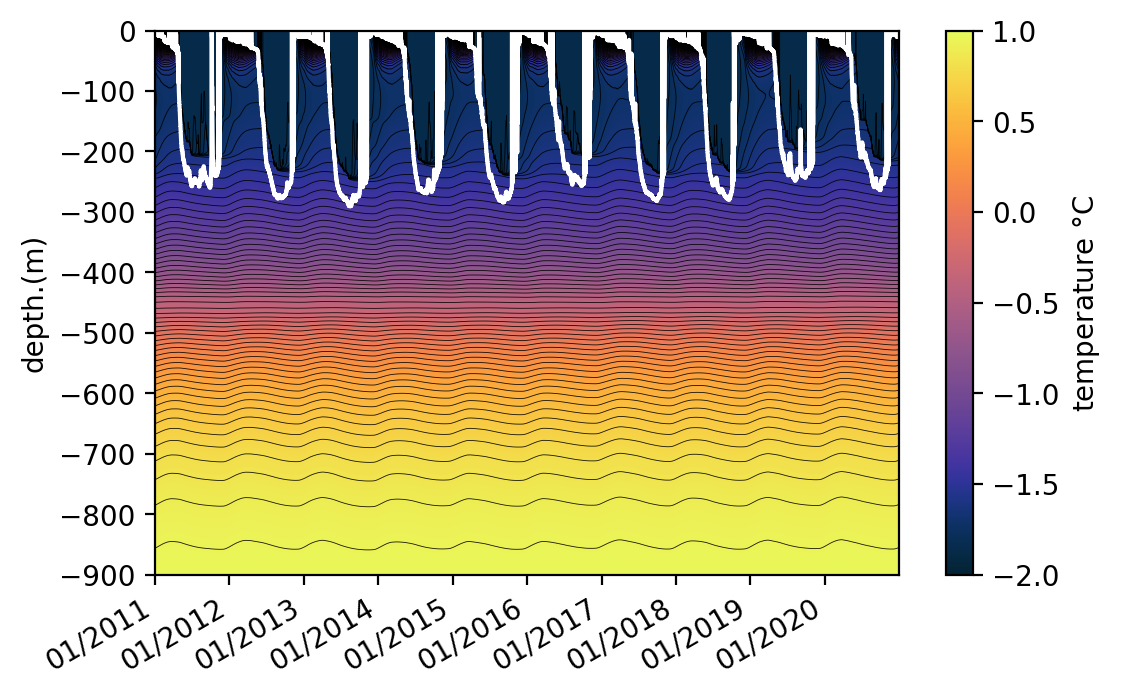

In [25]:
import matplotlib.dates as mdates

x1=mdates.date2num(data20112020.index[0].to_datetime64())
x2=mdates.date2num(data20112020.index[87648].to_datetime64())
x=mdates.date2num(np.array(data20112020[:87648].index.to_pydatetime(), dtype=np.datetime64))

fig,ax=plt.subplots(dpi=200)
ax.contour(np.flipud(temperature_out[:,:87648]),levels=np.arange(-2,1.0,.05),linestyles='solid',colors='black',linewidths=.3,alpha=.9,extent=[x1,x2,-900,0])
img=ax.imshow(temperature_out[:,:87648],cmap=cmocean.cm.thermal,aspect='auto',extent=[x1,x2,-900,0],vmin=-2.0,vmax=1.0)
cbar=plt.colorbar(img)
ax.plot(x,-mld_out[:87648],c='white')
ax.set_ylabel('depth.(m)')
cbar.set_label(r'temperature $\degree$C')
ax.xaxis_date()
date_format = mdates.DateFormatter('%m/%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

plt.show()

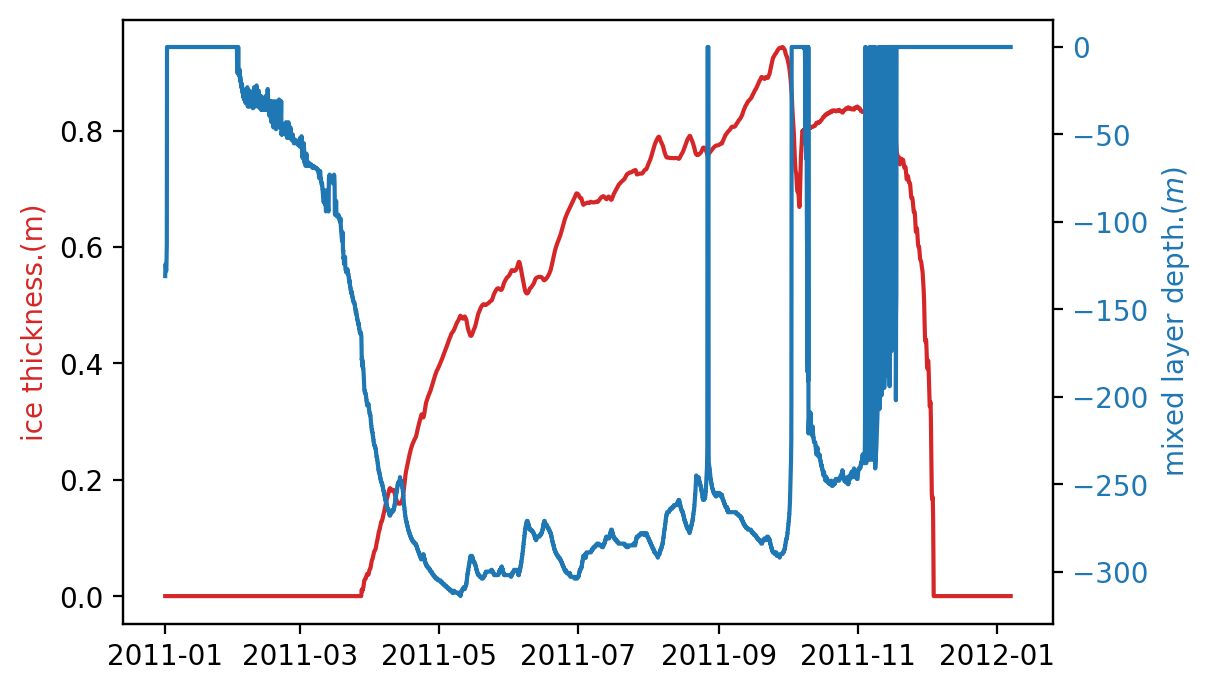

In [14]:
fig, ax1 = plt.subplots(dpi=200)
color = 'tab:red'
ax1.set_ylabel(r'ice thickness.(m)', color=color)
ax1.plot(data20112020.index[:8900],sea_ice_thickness_out[:8900]*sea_ice_concentration_out[:8900],color=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('mixed layer depth.($m$)', color=color)  # we already handled the x-label with ax1
ax2.plot(data20112020.index[:8900],-mld_out[:8900])
ax2.tick_params(axis='y', labelcolor=color)

In [ ]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_ylabel(r'ice thickness.(m)', color=color)
ax1.plot(data.index,ice_temperature_out,color=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Surface temperature.($\degree K$)', color=color)  # we already handled the x-label with ax1
ax2.plot(data.index,ocean_temperature_out)
ax2.tick_params(axis='y', labelcolor=color)